In [3]:
from qutip import *
from scipy import *
from random import *

import numpy as np
import matplotlib.pyplot as plt


N = 9
M = 10
# vertex numbr
V = 3
# colour number
C = 3

#edges matrix
E = [[1,1,1],[1,1,1],[1,1,1]]
E = np.array(E)


h  = 1.0
Jz = 1.0
Jx = 1.0

# Jy = 1.0 * 2 * pi * (1 - 2 * rand(N))

taumax = 100.0
taulist = np.linspace(0, taumax, 100)

si = qeye(2)
sx = sigmax()
sz = sigmaz()

# sy = sigmay()

si_list = []
sx_list = []
sz_list = []

# sy_list = []

for n in range(N):
    op_list = []
    for m in range(N):
        op_list.append(si)
        

    op_list[n] = sx
    sx_list.append(tensor(op_list))
    
    op_list[n] = sz
    sz_list.append(tensor(op_list))
    
    op_list[n] = si
    si_list.append(tensor(op_list))

# basis(0) for |-1| spin down 1 for |+1| spin up

# x(0) for sz |-1| spin down x(1) for sz |+1| spin up
# x = (sz+1)/2   sz=(-1) => x=0 sz=(+1) => x=1


# for n in range(N):
#     psi_list.append(basis(2,randrange(1)))
# psi_list = [basis(2,0) for n in range(N)]

#H0 transverse term
H0 = 0    
for n in range(N):
    H0 += Jx * sx_list[n]
    
    
# ev, es = H0.eigenstates(eigvals=M)
# psi_list = es[0]
psi_list = [basis(2,0),basis(2,0),basis(2,1),basis(2,0),basis(2,1),basis(2,0),basis(2,1),basis(2,0),basis(2,0)]
psi0 = tensor(psi_list)
    
#Hp problem term
Hp = 0   
vertex_sum = 0
for v in range(V):
    
    colour_sum = 0
    
    for c in range(C):
        colour_sum = colour_sum + sz_list[c+v*C]
    vertex_sum += (si_list[0] - colour_sum)**2
Hp += h * vertex_sum
# for n in range(N):
#     Hp += h[n] * sz_list[n]



In [4]:

colour_sum = 0
for c in range(C):
    # interaction terms
    for v in range(V):
        for v1 in range(v+1,V):
            colour_sum += np.triu(E)[v][v1] * sz_list[c+v*C] * sz_list[c+v1*C]
Hp += Jz * colour_sum


In [5]:


# the time-dependent hamiltonian in list-function format
args = {'t_max': max(taulist)}

h_t = [[H0, lambda t, args : (args['t_max']-t)/args['t_max']],
       [Hp, lambda t, args : t/args['t_max']]]

evals_mat = np.zeros((len(taulist),M))
ekets_mat = np.zeros((len(taulist),M),dtype = object)
P_mat = np.zeros((len(taulist),M))

idx = [0]
def process_rho(tau, psi):
    print(psi)
  
    # evaluate the Hamiltonian with gradually switched on interaction 
    H = Qobj.evaluate(h_t, tau, args)

    # find the M lowest eigenvalues of the system
    evals, ekets = H.eigenstates(eigvals=M)
#     print(ekets[0].shape)

    evals_mat[idx[0],:] = real(evals)
    ekets_mat[idx[0],:] = ekets
    
    # find the overlap between the eigenstates and psi 
    for n, eket in enumerate(ekets):
#         P_mat[idx[0],n] = abs(eket.overlap(psi))**2
        P_mat[idx[0],n] = abs((eket.dag().data * psi.data)[0,0])**2
        
    idx[0] += 1
    
sesolve(h_t, psi0, taulist, process_rho, args, options=Options(nsteps=100000), _safe_mode=True)

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 1.29548813e-03+2.03213627e-03j]
 [-1.04241726e-03-1.05207309e-03j]
 [-1.04241726e-03-1.05207309e-03j]
 [ 4.15881290e-04+5.19443656e-05j]
 [ 1.69226768e-02-9.59250359e-03j]
 [-8.63313439e-04+4.49403126e-03j]
 [-8.63313439e-04+4.49403126e-03j]
 [-2.79613796e-04+2.51223768e-04j]
 [-1.04241726e-03-1.05207309e-03j]
 [ 5.97722762e-04+2.98439081e-04j]
 [ 6.48698313e-04+2.59217900e-04j]
 [-8.33849882e-05+1.10817248e-04j]
 [-7.84159345e-03+6.89606374e-03j]
 [-6.47326767e-04-1.50821838e-03j]
 [-1.05154698e-03-1.87247569e-03j]
 [-4.90459625e-05-5.37723121e-04j]
 [ 1.69226768e-02-9.59250359e-03j]
 [-7.84159345e-03+6.89606374e-03j]
 [-4.05254667e-03+6.33058077e-03j]
 [-8.98028614e-04-1.44421897e-03j]
 [-5.93238538e-02-1.24450621e-01j]
 [ 2.81143403e-02+7.59500713e-03j]
 [ 1.87873338e-02-1.41577888e-02j]
 [ 6.44885827e-03+1.27355655e-03j]
 [-8.63313439e-04+4.49403126e-03j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 1.82656406e-03-2.52693385e-03j]
 [-6.80718780e-04+5.29214939e-03j]
 [-6.80718780e-04+5.29214939e-03j]
 [-1.24236613e-02-9.80652252e-03j]
 [ 1.68732598e-03-3.73501663e-04j]
 [-2.95170691e-04+2.91795254e-03j]
 [-2.95170691e-04+2.91795254e-03j]
 [-3.37432008e-03+7.28980333e-04j]
 [-6.80718780e-04+5.29214939e-03j]
 [-2.62634706e-03-8.43102588e-03j]
 [-8.44216395e-04-5.02336728e-03j]
 [ 2.98007779e-02+1.04289429e-02j]
 [-2.00872970e-03+1.84380078e-03j]
 [-1.20937697e-03-6.46990614e-03j]
 [-5.13017737e-04-5.77202297e-03j]
 [ 8.86987847e-03-4.45267183e-03j]
 [ 1.68732598e-03-3.73501663e-04j]
 [-2.00872970e-03+1.84380078e-03j]
 [-7.64439099e-04+1.87693966e-03j]
 [-1.07533204e-03-6.55661446e-03j]
 [ 8.52863426e-04+1.72670472e-04j]
 [-1.06514019e-03+8.86205864e-04j]
 [-7.51109080e-04+8.96465543e-04j]
 [-1.99262585e-03-1.16974061e-03j]
 [-2.95170691e-04+2.91795254e-03j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00216966+0.00360322j]
 [ 0.00253039-0.01535359j]
 [ 0.00253039-0.01535359j]
 [ 0.00688131+0.01052817j]
 [ 0.03327377+0.02338295j]
 [-0.02508668+0.00813018j]
 [-0.02508668+0.00813018j]
 [-0.00636225-0.00491546j]
 [ 0.00253039-0.01535359j]
 [ 0.00275115+0.01798825j]
 [ 0.00239352+0.01880217j]
 [-0.00984115-0.00168837j]
 [-0.04480289-0.03527623j]
 [ 0.01673942-0.01655803j]
 [ 0.0244602 -0.01905009j]
 [ 0.01359017-0.00466328j]
 [ 0.03327377+0.02338295j]
 [-0.04480289-0.03527623j]
 [-0.04088862-0.00770436j]
 [ 0.01815932-0.01752362j]
 [ 0.14318186-0.05854246j]
 [-0.02176453+0.0706435j ]
 [ 0.0425485 +0.06621433j]
 [-0.01022891+0.03504853j]
 [-0.02508668+0.00813018j]
 [ 0.01673942-0.01655803j]
 [ 0.01388974-0.0134556j ]
 [ 0.00736022+0.00594827j]
 [-0.02176453+0.0706435j ]
 [-0.03385177-0.00566934j]
 [-0.03012712-0.00479929j]
 [-0.02084186-0.00756538j]
 [ 0.0025303

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-3.17157979e-03+0.00425371j]
 [-1.97922379e-02+0.00105454j]
 [-1.97922379e-02+0.00105454j]
 [-2.14078279e-02+0.0134521j ]
 [ 2.79732416e-02-0.01453071j]
 [ 6.00955950e-05-0.03084301j]
 [ 6.00955950e-05-0.03084301j]
 [-1.75881465e-02+0.00193911j]
 [-1.97922379e-02+0.00105454j]
 [-3.06280981e-02+0.00927589j]
 [-3.12112822e-02+0.00774706j]
 [-1.35838144e-02+0.02319102j]
 [ 5.33942295e-02-0.01535865j]
 [-1.24614438e-02-0.03585758j]
 [-3.35212585e-03-0.05058846j]
 [-1.28539968e-02+0.01324924j]
 [ 2.79732416e-02-0.01453071j]
 [ 5.33942295e-02-0.01535865j]
 [ 2.33036401e-02-0.03101745j]
 [ 5.94198378e-03-0.0349209j ]
 [-6.35350993e-02+0.05108288j]
 [ 1.61085048e-02+0.06893327j]
 [ 4.89300143e-02+0.04556788j]
 [ 1.35802288e-02-0.02937768j]
 [ 6.00955950e-05-0.03084301j]
 [-1.24614438e-02-0.03585758j]
 [-2.04679405e-02-0.03017852j]
 [-2.16622673e-02-0.00421262j]
 [ 1.610

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.82357657e-02+8.71867367e-04j]
 [ 5.03102318e-04-4.30883081e-03j]
 [ 5.03102318e-04-4.30883081e-03j]
 [-5.12279243e-02-7.07199884e-03j]
 [-4.50860669e-03+6.37384667e-05j]
 [ 8.22721988e-03+1.96963909e-02j]
 [ 8.22721988e-03+1.96963909e-02j]
 [-2.85844325e-03+4.18342888e-03j]
 [ 5.03102318e-04-4.30883081e-03j]
 [-3.42582944e-03+5.55467537e-03j]
 [-8.55952036e-03+2.22646172e-02j]
 [ 9.21681727e-04-1.46363056e-02j]
 [ 5.62880547e-03+1.00174077e-02j]
 [-1.04514136e-02+1.19376111e-03j]
 [-1.09777514e-02+6.74206001e-04j]
 [ 1.72063344e-02+1.15042566e-02j]
 [-4.50860669e-03+6.37384667e-05j]
 [ 5.62880547e-03+1.00174077e-02j]
 [ 6.81487870e-03+6.81746650e-03j]
 [-1.21228950e-02+1.92214709e-06j]
 [ 1.45934361e-02-3.01322655e-03j]
 [ 2.70757899e-03+7.84038111e-03j]
 [ 5.44833458e-03+5.45272907e-03j]
 [-7.85067787e-03-8.78857333e-03j]
 [ 8.22721988e-03+1.96963909e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.32899570e-02-0.00718308j]
 [ 3.80908736e-03-0.00785305j]
 [ 3.80908736e-03-0.00785305j]
 [-8.43145977e-03-0.00291356j]
 [-5.94208810e-03+0.01353588j]
 [ 4.85123689e-03-0.00810613j]
 [ 4.85123689e-03-0.00810613j]
 [ 2.17926343e-03+0.01025295j]
 [ 3.80908736e-03-0.00785305j]
 [-2.56482860e-02-0.02374322j]
 [-9.14375604e-03-0.01702979j]
 [-3.27667096e-02-0.00502651j]
 [ 3.21032240e-02+0.02654927j]
 [ 1.41750700e-02+0.00751657j]
 [ 2.08569839e-02-0.02078327j]
 [ 1.96991623e-02+0.01407504j]
 [-5.94208810e-03+0.01353588j]
 [ 3.21032240e-02+0.02654927j]
 [ 9.81707922e-03-0.01148676j]
 [ 4.17634011e-02-0.00720123j]
 [-2.61768881e-02-0.00164065j]
 [-3.60275180e-02-0.01854118j]
 [ 3.14624211e-02+0.03497189j]
 [-1.28826880e-02-0.00395361j]
 [ 4.85123689e-03-0.00810613j]
 [ 1.41750700e-02+0.00751657j]
 [-1.33094343e-02+0.01961496j]
 [ 5.26035067e-03+0.00339446j]
 [-3.602

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-3.91069797e-03+1.37691747e-03j]
 [-7.27716894e-03+2.10396297e-03j]
 [-7.27716894e-03+2.10396297e-03j]
 [-2.13738693e-02+1.19945516e-02j]
 [ 2.64432962e-02+2.78209644e-02j]
 [ 7.07093449e-03+1.07714405e-02j]
 [ 7.07093449e-03+1.07714405e-02j]
 [-1.34938022e-02+1.70655365e-02j]
 [-7.27716894e-03+2.10396297e-03j]
 [ 6.94247079e-03+7.64398976e-03j]
 [-1.24606637e-02+6.62147289e-03j]
 [ 1.20975615e-03-2.32130436e-03j]
 [-9.13107446e-03-1.85410928e-02j]
 [-2.10840122e-02+1.75571594e-02j]
 [-3.66823554e-02+1.17755633e-02j]
 [ 5.60896283e-03+1.93959913e-02j]
 [ 2.64432962e-02+2.78209644e-02j]
 [-9.13107446e-03-1.85410928e-02j]
 [-3.24133823e-02+3.74348644e-03j]
 [-5.76430049e-02+2.13320618e-02j]
 [-8.67816774e-03+1.36191892e-02j]
 [ 3.76539295e-02+1.45615122e-02j]
 [ 4.32108852e-02-1.73104623e-02j]
 [-2.00988563e-02+1.79634031e-02j]
 [ 7.07093449e-03+1.07714405e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01071444-0.00377247j]
 [ 0.0096751 -0.01156993j]
 [ 0.0096751 -0.01156993j]
 [-0.00744941+0.00116829j]
 [ 0.00583994-0.00587208j]
 [ 0.01352087+0.01202742j]
 [ 0.01352087+0.01202742j]
 [-0.00776268-0.01021416j]
 [ 0.0096751 -0.01156993j]
 [ 0.04486188+0.00460406j]
 [-0.0253412 +0.00421506j]
 [-0.02622642+0.01568166j]
 [-0.02149072+0.01916214j]
 [ 0.00964838-0.01450051j]
 [ 0.01596438-0.03889842j]
 [ 0.00234509-0.01499414j]
 [ 0.00583994-0.00587208j]
 [-0.02149072+0.01916214j]
 [ 0.00650594+0.02222239j]
 [ 0.00483311-0.04089737j]
 [ 0.02808423+0.00591902j]
 [-0.00391301-0.01408382j]
 [ 0.01423165+0.00117405j]
 [ 0.005892  +0.00958781j]
 [ 0.01352087+0.01202742j]
 [ 0.00964838-0.01450051j]
 [-0.02174627+0.01353833j]
 [-0.00951619+0.00546873j]
 [-0.00391301-0.01408382j]
 [ 0.0143192 -0.00752717j]
 [ 0.003596  -0.00274686j]
 [-0.00615219-0.00075325j]
 [ 0.0096751

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01310545+9.91198719e-03j]
 [-0.0107496 +1.10692030e-02j]
 [-0.0107496 +1.10692030e-02j]
 [-0.00356902-1.32208078e-02j]
 [ 0.03872918-2.16047066e-02j]
 [ 0.00325754+1.10644659e-03j]
 [ 0.00325754+1.10644659e-03j]
 [-0.01353231+9.23502927e-04j]
 [-0.0107496 +1.10692030e-02j]
 [-0.00379399+3.00179927e-03j]
 [-0.01082122-1.81798700e-02j]
 [-0.00095741+1.14727202e-02j]
 [ 0.01508009+2.68591035e-03j]
 [ 0.01305615+1.85859806e-02j]
 [-0.00047729-1.83539573e-03j]
 [-0.00539776-1.44342528e-02j]
 [ 0.03872918-2.16047066e-02j]
 [ 0.01508009+2.68591035e-03j]
 [ 0.00254991+1.86979912e-03j]
 [-0.00631771-2.19554642e-02j]
 [-0.01678627-8.65786318e-03j]
 [ 0.01091267-6.06471136e-02j]
 [-0.0081251 +2.50337883e-02j]
 [ 0.01093527-2.02954339e-02j]
 [ 0.00325754+1.10644659e-03j]
 [ 0.01305615+1.85859806e-02j]
 [-0.02513408+5.12620374e-02j]
 [-0.00927413+1.02344165e-02j]
 [ 0.010

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-3.14612665e-02+6.64080336e-03j]
 [-4.36058929e-03-8.19976327e-03j]
 [-4.36058929e-03-8.19976327e-03j]
 [-3.96462324e-02-5.57004899e-03j]
 [-1.29179420e-02-9.09149780e-03j]
 [ 9.89963704e-03+3.92128380e-03j]
 [ 9.89963704e-03+3.92128380e-03j]
 [ 1.21539245e-02+4.49959059e-03j]
 [-4.36058929e-03-8.19976327e-03j]
 [-7.00048403e-02-3.48971651e-02j]
 [ 4.19960492e-02+4.72577512e-02j]
 [-1.40731137e-02+5.17587484e-02j]
 [-4.04457061e-03-2.20837978e-02j]
 [ 3.90901460e-02-7.64415514e-03j]
 [-2.78197953e-02-8.94567440e-03j]
 [-1.62645471e-02-1.94269539e-02j]
 [-1.29179420e-02-9.09149780e-03j]
 [-4.04457061e-03-2.20837978e-02j]
 [ 9.28419967e-03-8.56051057e-03j]
 [-1.66873609e-02+9.93271596e-03j]
 [-1.61231194e-02-1.73342134e-02j]
 [ 3.53602887e-02+1.46566149e-02j]
 [ 1.77935514e-02+3.34109709e-03j]
 [-1.70559406e-02+9.42039177e-04j]
 [ 9.89963704e-03+3.92128380e-03j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00174688-0.00180263j]
 [-0.01405609-0.02916138j]
 [-0.01405609-0.02916138j]
 [ 0.00258907+0.00620358j]
 [ 0.01885778+0.04505661j]
 [-0.00247216-0.0121047j ]
 [-0.00247216-0.0121047j ]
 [ 0.00186671+0.00580995j]
 [-0.01405609-0.02916138j]
 [ 0.01435167+0.01191667j]
 [-0.00540982+0.02595651j]
 [-0.01595655+0.01519619j]
 [ 0.03396411-0.03633238j]
 [-0.02090998+0.01277797j]
 [-0.0268603 +0.03261815j]
 [ 0.027506  +0.00883242j]
 [ 0.01885778+0.04505661j]
 [ 0.03396411-0.03633238j]
 [-0.01345038-0.00738137j]
 [-0.01735178+0.02719495j]
 [-0.03108592+0.00644982j]
 [ 0.04616207-0.02121442j]
 [-0.01244652+0.01177549j]
 [-0.00748863-0.01706625j]
 [-0.00247216-0.0121047j ]
 [-0.02090998+0.01277797j]
 [-0.00588432+0.0342078j ]
 [-0.0006159 -0.02053692j]
 [ 0.04616207-0.02121442j]
 [-0.0049046 -0.02651244j]
 [ 0.00990676-0.00637221j]
 [-0.00029081-0.00351853j]
 [-0.0140560

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 2.23401581e-02+0.03201329j]
 [-3.84359343e-04+0.02509051j]
 [-3.84359343e-04+0.02509051j]
 [-1.33561014e-02+0.00497456j]
 [ 3.01170656e-02-0.03485608j]
 [-3.68265033e-03-0.00304306j]
 [-3.68265033e-03-0.00304306j]
 [ 9.90120590e-03-0.015624j  ]
 [-3.84359343e-04+0.02509051j]
 [-2.96478007e-02-0.0275768j ]
 [-6.96405365e-03-0.00627888j]
 [-1.18021978e-02-0.02756851j]
 [-2.85045493e-02+0.01636529j]
 [ 6.24791683e-04+0.00957266j]
 [ 2.28832246e-02-0.00109722j]
 [ 1.49754506e-02+0.04344656j]
 [ 3.01170656e-02-0.03485608j]
 [-2.85045493e-02+0.01636529j]
 [ 1.13818431e-02+0.01212949j]
 [-4.51996541e-03+0.02875167j]
 [-2.34244142e-02-0.03229151j]
 [-1.10313790e-02-0.02301702j]
 [-7.65766237e-03+0.0158873j ]
 [-2.51416986e-02-0.0359232j ]
 [-3.68265033e-03-0.00304306j]
 [ 6.24791683e-04+0.00957266j]
 [ 8.08379868e-03-0.00134024j]
 [ 2.01896645e-02+0.01509428j]
 [-1.103

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-2.43458023e-02+2.68058120e-02j]
 [ 2.78184297e-02-1.40456104e-02j]
 [ 2.78184297e-02-1.40456104e-02j]
 [ 2.24565287e-02+2.25152753e-02j]
 [-2.23566073e-02+6.74562303e-02j]
 [-1.28610699e-02-6.33704542e-03j]
 [-1.28610699e-02-6.33704542e-03j]
 [-1.55915562e-03+4.23741750e-03j]
 [ 2.78184297e-02-1.40456104e-02j]
 [ 2.66322731e-02-2.21441083e-02j]
 [-1.17053371e-02+3.35739830e-02j]
 [ 1.20363678e-02+1.67479359e-02j]
 [-7.48963953e-03-1.07127504e-02j]
 [-4.07296717e-02-9.25173499e-03j]
 [ 7.45076729e-02-1.09269412e-02j]
 [-1.26640715e-02-1.64749745e-02j]
 [-2.23566073e-02+6.74562303e-02j]
 [-7.48963953e-03-1.07127504e-02j]
 [-1.07104429e-02-1.67526647e-02j]
 [-2.25863172e-03+1.90121989e-03j]
 [-8.53745197e-05+5.65592512e-03j]
 [-3.94242560e-02-1.10800296e-02j]
 [-4.50064157e-02+2.14956199e-02j]
 [ 2.00431315e-02+2.62477791e-02j]
 [-1.28610699e-02-6.33704542e-03j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.79161606e-02+0.03272436j]
 [-1.39931973e-02+0.03151501j]
 [-1.39931973e-02+0.03151501j]
 [ 1.55154482e-02-0.00114142j]
 [ 2.47386375e-02-0.0754048j ]
 [ 1.65717844e-02-0.01666587j]
 [ 1.65717844e-02-0.01666587j]
 [-1.38938570e-02+0.02235582j]
 [-1.39931973e-02+0.03151501j]
 [ 1.08492815e-02-0.00168609j]
 [-2.12823786e-02+0.00062606j]
 [ 1.41760305e-03-0.01176138j]
 [-9.50841415e-03+0.00082577j]
 [ 2.02349169e-03-0.00285907j]
 [ 1.21205318e-02-0.01117601j]
 [-2.46495989e-02-0.01014835j]
 [ 2.47386375e-02-0.0754048j ]
 [-9.50841415e-03+0.00082577j]
 [ 2.21620854e-02+0.00434592j]
 [-1.36302920e-02+0.01048755j]
 [-1.13791095e-02-0.03868891j]
 [ 3.26572113e-02-0.01502276j]
 [-2.68745626e-02+0.03609637j]
 [ 5.09200406e-03+0.0029479j ]
 [ 1.65717844e-02-0.01666587j]
 [ 2.02349169e-03-0.00285907j]
 [-5.83453684e-03+0.03658672j]
 [ 3.17992810e-02-0.01099191j]
 [ 3.265

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.01360302-0.0247857j ]
 [-0.00851969-0.04045451j]
 [-0.00851969-0.04045451j]
 [-0.02840405+0.05380312j]
 [-0.00919405-0.00363113j]
 [-0.00212161-0.0435392j ]
 [-0.00212161-0.0435392j ]
 [ 0.02129976-0.00829105j]
 [-0.00851969-0.04045451j]
 [ 0.03516576+0.00026273j]
 [ 0.01524204-0.03781331j]
 [ 0.02974494+0.02844402j]
 [-0.03105704+0.00083768j]
 [ 0.01107007-0.01025953j]
 [-0.04391228+0.02390238j]
 [ 0.01694993-0.00673292j]
 [-0.00919405-0.00363113j]
 [-0.03105704+0.00083768j]
 [-0.01311128-0.02212258j]
 [-0.0234103 +0.01525524j]
 [ 0.01945581+0.04642028j]
 [-0.02342921-0.0050731j ]
 [-0.0247584 -0.01775524j]
 [ 0.02074237+0.0208143j ]
 [-0.00212161-0.0435392j ]
 [ 0.01107007-0.01025953j]
 [ 0.01130612-0.02536691j]
 [-0.0242642 -0.00340822j]
 [-0.02342921-0.0050731j ]
 [ 0.05612812+0.06195523j]
 [-0.0353797 -0.00211415j]
 [ 0.01180001-0.01777258j]
 [-0.0085196

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.05620979+0.03370933j]
 [-0.0116902 +0.00847033j]
 [-0.0116902 +0.00847033j]
 [-0.02081615-0.01159208j]
 [-0.01609226-0.0648834j ]
 [-0.00496463-0.00164359j]
 [-0.00496463-0.00164359j]
 [ 0.02200617+0.00657392j]
 [-0.0116902 +0.00847033j]
 [ 0.01170121-0.00460709j]
 [ 0.02199285+0.03473038j]
 [-0.03926554-0.03311535j]
 [-0.04079068+0.01698339j]
 [ 0.0232972 +0.00581032j]
 [ 0.00463103+0.0354177j ]
 [ 0.02161422+0.00483581j]
 [-0.01609226-0.0648834j ]
 [-0.04079068+0.01698339j]
 [ 0.01764   -0.01619267j]
 [-0.01346752+0.03769604j]
 [-0.05182663+0.01399988j]
 [-0.00910172-0.08777489j]
 [ 0.00422461+0.04570765j]
 [-0.0251483 +0.01365623j]
 [-0.00496463-0.00164359j]
 [ 0.0232972 +0.00581032j]
 [ 0.02452314+0.01694171j]
 [ 0.01245998+0.02833409j]
 [-0.00910172-0.08777489j]
 [ 0.02484369-0.02225174j]
 [-0.00291652-0.00325733j]
 [ 0.00243916+0.02139643j]
 [-0.0116902

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.03482484+0.01371021j]
 [-0.04130354+0.00500157j]
 [-0.04130354+0.00500157j]
 [-0.03757806-0.02589423j]
 [ 0.07305894+0.02182856j]
 [ 0.02851074+0.0281419j ]
 [ 0.02851074+0.0281419j ]
 [ 0.0142227 -0.00411602j]
 [-0.04130354+0.00500157j]
 [ 0.04295108+0.05065454j]
 [-0.01194225-0.00279711j]
 [-0.0155245 -0.01450991j]
 [-0.00967469-0.011743j  ]
 [ 0.03922662+0.01232234j]
 [ 0.01291154+0.00833232j]
 [ 0.00774903-0.01306723j]
 [ 0.07305894+0.02182856j]
 [-0.00967469-0.011743j  ]
 [-0.03436711-0.02473208j]
 [ 0.03017829-0.00240081j]
 [ 0.01958418+0.04896103j]
 [-0.00514113-0.03334494j]
 [-0.00446931+0.02987438j]
 [-0.00956752+0.0233733j ]
 [ 0.02851074+0.0281419j ]
 [ 0.03922662+0.01232234j]
 [-0.06125053+0.02710552j]
 [ 0.00801932-0.01187368j]
 [-0.00514113-0.03334494j]
 [-0.03736877+0.01246911j]
 [-0.02490962-0.03355591j]
 [ 0.03087831+0.0014574j ]
 [-0.0413035

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.01274847-0.01989921j]
 [-0.00451601-0.00164956j]
 [-0.00451601-0.00164956j]
 [-0.06874279-0.01286883j]
 [-0.02760751+0.01761118j]
 [ 0.01191355-0.00314031j]
 [ 0.01191355-0.00314031j]
 [ 0.00156672-0.01382312j]
 [-0.00451601-0.00164956j]
 [ 0.00583283+0.00283292j]
 [ 0.03583314-0.02652511j]
 [ 0.00390267-0.01024686j]
 [ 0.00737082+0.02343824j]
 [ 0.04342232-0.0174138j ]
 [-0.00966242+0.0035914j ]
 [-0.01287812+0.01732929j]
 [-0.02760751+0.01761118j]
 [ 0.00737082+0.02343824j]
 [-0.01310139-0.03972357j]
 [-0.02044948-0.03894202j]
 [-0.00731267+0.02322974j]
 [-0.03235496+0.0034609j ]
 [ 0.04511298+0.00622664j]
 [-0.01649935+0.0030167j ]
 [ 0.01191355-0.00314031j]
 [ 0.04342232-0.0174138j ]
 [-0.01722856+0.00616825j]
 [ 0.01349292-0.00449652j]
 [-0.03235496+0.0034609j ]
 [-0.05215699-0.05863651j]
 [-0.02494216+0.01626995j]
 [ 0.01520673+0.00199067j]
 [-0.0045160

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.04244748-0.00078744j]
 [-0.01975196+0.01158833j]
 [-0.01975196+0.01158833j]
 [ 0.00763029-0.03718775j]
 [ 0.04944668+0.02084764j]
 [-0.00412533+0.05993208j]
 [-0.00412533+0.05993208j]
 [ 0.02457935-0.01742169j]
 [-0.01975196+0.01158833j]
 [ 0.01108566+0.03328035j]
 [ 0.03172204+0.01328858j]
 [ 0.01712244-0.01089752j]
 [ 0.04884233-0.02356175j]
 [-0.00855862-0.00191847j]
 [-0.00570639+0.01901242j]
 [-0.03598339+0.02818575j]
 [ 0.04944668+0.02084764j]
 [ 0.04884233-0.02356175j]
 [ 0.01224444-0.01495452j]
 [-0.00540563+0.01042587j]
 [ 0.00210266+0.00663395j]
 [ 0.00835799-0.07520169j]
 [ 0.00942007-0.02723234j]
 [-0.04267394+0.00013082j]
 [-0.00412533+0.05993208j]
 [-0.00855862-0.00191847j]
 [-0.00267941-0.02939572j]
 [-0.02795668-0.01803456j]
 [ 0.00835799-0.07520169j]
 [-0.00527054-0.04297407j]
 [-0.00539922-0.01401615j]
 [ 0.03024472-0.00584275j]
 [-0.0197519

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.04031448-0.01960556j]
 [ 0.03246183-0.00944906j]
 [ 0.03246183-0.00944906j]
 [ 0.0260921 +0.04450217j]
 [-0.00953891+0.00337103j]
 [ 0.02725482-0.0315879j ]
 [ 0.02725482-0.0315879j ]
 [ 0.01465445-0.00350751j]
 [ 0.03246183-0.00944906j]
 [-0.00348366-0.00463709j]
 [ 0.01180486-0.01304551j]
 [-0.03912602+0.0198514j ]
 [-0.0475591 -0.02937617j]
 [-0.0002237 -0.00670563j]
 [-0.01627572-0.01698281j]
 [ 0.01839572+0.03435769j]
 [-0.00953891+0.00337103j]
 [-0.0475591 -0.02937617j]
 [ 0.01111463+0.02467019j]
 [-0.01275341+0.00744097j]
 [-0.01553921+0.04848075j]
 [ 0.05231339+0.01143789j]
 [-0.03578346-0.06354715j]
 [-0.01334695-0.03333095j]
 [ 0.02725482-0.0315879j ]
 [-0.0002237 -0.00670563j]
 [ 0.00102413+0.013453j  ]
 [-0.02541736-0.01363214j]
 [ 0.05231339+0.01143789j]
 [-0.00754983+0.10786962j]
 [ 0.03472722-0.01655732j]
 [-0.0061434 -0.01166214j]
 [ 0.0324618

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01008768+0.02907984j]
 [-0.02396965-0.00144174j]
 [-0.02396965-0.00144174j]
 [-0.13272056-0.01285329j]
 [ 0.02840248+0.01385065j]
 [ 0.02576042+0.0329159j ]
 [ 0.02576042+0.0329159j ]
 [ 0.01735995+0.00410201j]
 [-0.02396965-0.00144174j]
 [ 0.05189212-0.03241582j]
 [ 0.01397006+0.05666914j]
 [ 0.0139516 +0.00338687j]
 [-0.05752227+0.01975387j]
 [-0.01252279+0.00659759j]
 [ 0.03086088+0.02020772j]
 [-0.03331082+0.00449257j]
 [ 0.02840248+0.01385065j]
 [-0.05752227+0.01975387j]
 [ 0.00654485-0.05192456j]
 [-0.01104254-0.06196187j]
 [-0.0666417 -0.08195177j]
 [-0.02641065-0.03158023j]
 [-0.03654099+0.07414387j]
 [ 0.04630255-0.04967006j]
 [ 0.02576042+0.0329159j ]
 [-0.01252279+0.00659759j]
 [ 0.01494529-0.03135356j]
 [ 0.04416591-0.0151075j ]
 [-0.02641065-0.03158023j]
 [-0.01963202-0.0275984j ]
 [-0.02365998+0.01181905j]
 [ 0.01122979+0.04244658j]
 [-0.0239696

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.03550468+0.05507734j]
 [-0.00029471+0.0057775j ]
 [-0.00029471+0.0057775j ]
 [ 0.05934601-0.03496843j]
 [ 0.03956574-0.02396143j]
 [-0.01011341-0.00106907j]
 [-0.01011341-0.00106907j]
 [ 0.00677502+0.03711988j]
 [-0.00029471+0.0057775j ]
 [-0.0335305 +0.01185277j]
 [-0.01128501+0.00152558j]
 [-0.02555759+0.01439387j]
 [ 0.04549884+0.00712941j]
 [ 0.02171355-0.00793693j]
 [-0.00647151-0.01923943j]
 [ 0.02698844-0.00059635j]
 [ 0.03956574-0.02396143j]
 [ 0.04549884+0.00712941j]
 [ 0.00996932-0.00545934j]
 [ 0.00691639-0.06647975j]
 [-0.0358017 -0.02790332j]
 [ 0.00365972+0.03522737j]
 [ 0.02244571+0.00428033j]
 [ 0.00778124-0.02910264j]
 [-0.01011341-0.00106907j]
 [ 0.02171355-0.00793693j]
 [-0.00902983+0.04064444j]
 [ 0.02790708+0.03666161j]
 [ 0.00365972+0.03522737j]
 [ 0.03561207+0.05654946j]
 [ 0.01210924-0.01930088j]
 [ 0.01447845-0.02340714j]
 [-0.0002947

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.78457078e-02-1.96196537e-04j]
 [-1.59768570e-02-1.44538047e-02j]
 [-1.59768570e-02-1.44538047e-02j]
 [-5.19946449e-02-5.45735277e-03j]
 [ 4.52553869e-03-9.49012861e-03j]
 [-2.66106301e-02-2.12050440e-02j]
 [-2.66106301e-02-2.12050440e-02j]
 [ 9.84836193e-03-3.00956461e-02j]
 [-1.59768570e-02-1.44538047e-02j]
 [-5.20675811e-02+1.75836791e-02j]
 [ 9.10605669e-03+7.76470655e-03j]
 [ 3.05102525e-02-4.68422525e-02j]
 [ 7.74451142e-02-2.69062222e-02j]
 [-1.36715379e-02-1.59532812e-02j]
 [-9.08030983e-03+2.81100988e-02j]
 [-3.12676476e-02+7.62512402e-03j]
 [ 4.52553869e-03-9.49012861e-03j]
 [ 7.74451142e-02-2.69062222e-02j]
 [ 2.00043735e-02-2.14538165e-02j]
 [ 1.88714092e-02+1.03182115e-02j]
 [ 2.09442339e-02-1.12889090e-02j]
 [-5.72052272e-03+5.82737396e-03j]
 [ 6.03682878e-02+3.27274351e-04j]
 [-1.01284982e-02-4.81933372e-03j]
 [-2.66106301e-02-2.12050440e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.0445505 +1.07128184e-01j]
 [-0.00515375-1.31343048e-02j]
 [-0.00515375-1.31343048e-02j]
 [ 0.02775518+1.31977740e-02j]
 [ 0.04378645+2.04214924e-03j]
 [ 0.00808161-2.97493232e-02j]
 [ 0.00808161-2.97493232e-02j]
 [-0.02285517+4.77912626e-02j]
 [-0.00515375-1.31343048e-02j]
 [-0.0016054 +3.94812342e-02j]
 [-0.0280551 -6.07316011e-02j]
 [-0.06062332-3.51616418e-02j]
 [ 0.00786146-1.68513002e-02j]
 [ 0.01422604-4.08487811e-02j]
 [-0.03665351+5.14701180e-03j]
 [ 0.03221736+3.78621394e-03j]
 [ 0.04378645+2.04214924e-03j]
 [ 0.00786146-1.68513002e-02j]
 [ 0.00888342+4.96462367e-02j]
 [ 0.02327201+6.04520127e-03j]
 [ 0.02563674+2.29690326e-02j]
 [ 0.0412324 +5.72999017e-03j]
 [-0.02796017-5.13943047e-02j]
 [-0.0038875 -9.31302125e-03j]
 [ 0.00808161-2.97493232e-02j]
 [ 0.01422604-4.08487811e-02j]
 [ 0.04250022+4.83014124e-02j]
 [-0.0099251 +6.59971499e-02j]
 [ 0.041

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 1.64005885e-03-0.02944387j]
 [ 1.02399855e-02-0.01549199j]
 [ 1.02399855e-02-0.01549199j]
 [-2.01254244e-02+0.02224227j]
 [ 2.07876216e-02+0.03403387j]
 [ 5.65687071e-02-0.0061141j ]
 [ 5.65687071e-02-0.0061141j ]
 [-1.43442719e-03-0.02363836j]
 [ 1.02399855e-02-0.01549199j]
 [ 5.63913832e-02-0.07604252j]
 [-4.10268649e-02-0.01996962j]
 [-2.38835788e-02-0.00322081j]
 [ 1.78293148e-02+0.04799126j]
 [-2.68311774e-02-0.01338523j]
 [ 4.62411410e-02+0.0682612j ]
 [-8.60532974e-03-0.03237475j]
 [ 2.07876216e-02+0.03403387j]
 [ 1.78293148e-02+0.04799126j]
 [-3.44714071e-02+0.00508659j]
 [-5.20839723e-03+0.02239053j]
 [ 5.90622574e-02-0.06748587j]
 [-6.52585207e-03+0.00163289j]
 [ 1.84822279e-03-0.03275196j]
 [ 2.98333759e-02+0.01329429j]
 [ 5.65687071e-02-0.0061141j ]
 [-2.68311774e-02-0.01338523j]
 [-2.16216545e-02-0.04584982j]
 [-1.77524968e-02-0.0053258j ]
 [-6.525

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 1.49158195e-02-0.03049672j]
 [ 4.29995328e-02+0.02488363j]
 [ 4.29995328e-02+0.02488363j]
 [-7.50622840e-02-0.02704467j]
 [-4.01683528e-02-0.02039757j]
 [ 4.14404674e-02+0.00898743j]
 [ 4.14404674e-02+0.00898743j]
 [-4.93266488e-03-0.03611048j]
 [ 4.29995328e-02+0.02488363j]
 [-5.98905942e-02+0.03613599j]
 [ 9.82431277e-03-0.01385133j]
 [-9.51842456e-05-0.01364526j]
 [ 2.71965958e-02-0.00901631j]
 [ 2.42920617e-03+0.00401975j]
 [-1.01507755e-02-0.01033729j]
 [-5.71882964e-02-0.00551074j]
 [-4.01683528e-02-0.02039757j]
 [ 2.71965958e-02-0.00901631j]
 [ 9.44105374e-03+0.03426316j]
 [ 5.51040082e-02+0.01829857j]
 [ 1.85794960e-03-0.06756824j]
 [-8.82795069e-03+0.01428653j]
 [ 9.78169074e-03-0.06780053j]
 [ 1.78444710e-02-0.01157339j]
 [ 4.14404674e-02+0.00898743j]
 [ 2.42920617e-03+0.00401975j]
 [ 9.82570208e-04+0.04914734j]
 [-4.48123975e-02-0.00431685j]
 [-8.827

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00881324-0.03132669j]
 [-0.03273818-0.0031638j ]
 [-0.03273818-0.0031638j ]
 [ 0.06711964+0.06185544j]
 [ 0.03081686+0.05537004j]
 [-0.0177565 -0.02937798j]
 [-0.0177565 -0.02937798j]
 [ 0.02572532-0.04542979j]
 [-0.03273818-0.0031638j ]
 [-0.02115037-0.03246782j]
 [-0.00962065+0.04188777j]
 [ 0.03299502+0.04389461j]
 [-0.00783285+0.00590752j]
 [ 0.04351491+0.01028929j]
 [ 0.01740946-0.01624102j]
 [-0.04248857+0.01313947j]
 [ 0.03081686+0.05537004j]
 [-0.00783285+0.00590752j]
 [ 0.0398837 +0.02111749j]
 [ 0.04664285-0.06321143j]
 [ 0.07353446-0.0070908j ]
 [-0.01355575-0.01429405j]
 [-0.03470993-0.01313254j]
 [-0.05475162-0.00373161j]
 [-0.0177565 -0.02937798j]
 [ 0.04351491+0.01028929j]
 [ 0.01007484+0.03200948j]
 [ 0.01609698-0.00120523j]
 [-0.01355575-0.01429405j]
 [ 0.01211258+0.02559443j]
 [-0.04360921+0.02405124j]
 [ 0.01873653-0.00437431j]
 [-0.0327381

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.02791819-0.01886903j]
 [ 0.01522402-0.0213648j ]
 [ 0.01522402-0.0213648j ]
 [-0.01734509-0.00026874j]
 [ 0.02030775+0.02596693j]
 [ 0.01564624+0.00034397j]
 [ 0.01564624+0.00034397j]
 [ 0.01668719+0.00025091j]
 [ 0.01522402-0.0213648j ]
 [-0.06053272+0.05891381j]
 [ 0.03404989-0.03652544j]
 [ 0.05258123-0.00421295j]
 [ 0.00098319+0.03996966j]
 [ 0.04163289-0.00820477j]
 [-0.00922533-0.0379084j ]
 [-0.03298371+0.01645337j]
 [ 0.02030775+0.02596693j]
 [ 0.00098319+0.03996966j]
 [-0.01667317+0.02557722j]
 [ 0.0412282 +0.0454579j ]
 [ 0.0214023 -0.01534334j]
 [ 0.02309925-0.01149671j]
 [ 0.02315393+0.01240364j]
 [-0.02619161-0.00949075j]
 [ 0.01564624+0.00034397j]
 [ 0.04163289-0.00820477j]
 [-0.02981511-0.02914652j]
 [ 0.0213169 +0.01809756j]
 [ 0.02309925-0.01149671j]
 [-0.00387583+0.04254948j]
 [ 0.01035223-0.012839j  ]
 [ 0.00880059-0.01358828j]
 [ 0.0152240

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-2.36894660e-02+0.02390463j]
 [-1.60888532e-02-0.0297976j ]
 [-1.60888532e-02-0.0297976j ]
 [ 4.49196703e-02-0.00129718j]
 [ 5.01495010e-02+0.08197372j]
 [ 9.46812104e-03+0.00543652j]
 [ 9.46812104e-03+0.00543652j]
 [-1.71444642e-02-0.00092647j]
 [-1.60888532e-02-0.0297976j ]
 [ 3.84435003e-02-0.01898569j]
 [ 2.17755873e-02+0.02379776j]
 [ 4.47288938e-02-0.0269974j ]
 [-7.31677872e-03+0.04307818j]
 [-5.55540484e-02+0.00041688j]
 [ 2.64985258e-02+0.04610156j]
 [-2.01012031e-02+0.02338433j]
 [ 5.01495010e-02+0.08197372j]
 [-7.31677872e-03+0.04307818j]
 [-4.76722170e-02-0.02181021j]
 [-2.05343898e-02-0.0107283j ]
 [-5.57178190e-02-0.01869378j]
 [-1.90729407e-02-0.00018061j]
 [ 1.25545729e-04-0.01674705j]
 [ 1.59397490e-02+0.00828645j]
 [ 9.46812104e-03+0.00543652j]
 [-5.55540484e-02+0.00041688j]
 [ 3.52685581e-02-0.01352001j]
 [-3.83624548e-02+0.00943824j]
 [-1.907

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00606273+1.09112491e-04j]
 [ 0.03719708-1.56783410e-02j]
 [ 0.03719708-1.56783410e-02j]
 [-0.076865  +1.08389023e-02j]
 [-0.00367093+4.35617742e-02j]
 [ 0.02917115+3.30644436e-02j]
 [ 0.02917115+3.30644436e-02j]
 [ 0.03257987+1.05668639e-02j]
 [ 0.03719708-1.56783410e-02j]
 [-0.02587307-1.17087173e-02j]
 [ 0.01883859-4.90047572e-05j]
 [-0.00157182-1.18438185e-02j]
 [ 0.02170995+2.44158495e-02j]
 [ 0.03311579-1.38304210e-02j]
 [-0.02316664-1.23264306e-03j]
 [-0.0036973 -1.32017783e-02j]
 [-0.00367093+4.35617742e-02j]
 [ 0.02170995+2.44158495e-02j]
 [ 0.03805593+3.89007418e-02j]
 [ 0.01113738+3.99856403e-02j]
 [-0.04285777-8.66084238e-02j]
 [ 0.00960921+1.20054093e-02j]
 [ 0.02844374+3.39698550e-02j]
 [ 0.01184025-3.88719907e-03j]
 [ 0.02917115+3.30644436e-02j]
 [ 0.03311579-1.38304210e-02j]
 [ 0.00152168-4.59377429e-02j]
 [-0.01443763+4.01602931e-02j]
 [ 0.009

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.07097328+2.02513441e-03j]
 [-0.00729403+1.06854871e-02j]
 [-0.00729403+1.06854871e-02j]
 [-0.03159517-3.90936057e-03j]
 [ 0.0620508 -6.32902720e-03j]
 [ 0.02470922-2.37059171e-02j]
 [ 0.02470922-2.37059171e-02j]
 [-0.04805111+1.73861430e-02j]
 [-0.00729403+1.06854871e-02j]
 [ 0.0597531 -6.70920997e-03j]
 [ 0.01079063+2.59862078e-02j]
 [ 0.01485162-3.73593611e-02j]
 [-0.02922277+6.16799963e-03j]
 [-0.04401106+2.32563612e-02j]
 [-0.00457137+1.33882048e-02j]
 [-0.04097541+4.02832339e-02j]
 [ 0.0620508 -6.32902720e-03j]
 [-0.02922277+6.16799963e-03j]
 [-0.01978388-7.94054591e-03j]
 [-0.02814   +5.58198397e-02j]
 [-0.0316688 +6.92525757e-02j]
 [ 0.01067564-1.37493923e-02j]
 [ 0.00387024+6.52298489e-03j]
 [ 0.00064788-1.99612598e-02j]
 [ 0.02470922-2.37059171e-02j]
 [-0.04401106+2.32563612e-02j]
 [ 0.02896291+3.13444177e-02j]
 [-0.03549369+4.18762820e-02j]
 [ 0.010

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01528673+0.00686158j]
 [-0.00340043-0.0209251j ]
 [-0.00340043-0.0209251j ]
 [ 0.00935957+0.03927719j]
 [ 0.02370423-0.02961841j]
 [ 0.0416722 -0.05336509j]
 [ 0.0416722 -0.05336509j]
 [-0.00440247-0.01384462j]
 [-0.00340043-0.0209251j ]
 [ 0.00437705+0.02839602j]
 [ 0.06377851-0.01306215j]
 [-0.01536629+0.03977059j]
 [-0.06101643-0.03192352j]
 [ 0.04230817-0.00691194j]
 [ 0.0466445 -0.01112383j]
 [ 0.00970258-0.01208184j]
 [ 0.02370423-0.02961841j]
 [-0.06101643-0.03192352j]
 [-0.03389809+0.02358419j]
 [-0.05735067-0.06720325j]
 [ 0.05691258+0.02873021j]
 [ 0.00172147+0.00891897j]
 [-0.02951328-0.00411876j]
 [-0.01169603+0.00654113j]
 [ 0.0416722 -0.05336509j]
 [ 0.04230817-0.00691194j]
 [ 0.02859652-0.02725551j]
 [-0.03201855+0.01561292j]
 [ 0.00172147+0.00891897j]
 [-0.02034835+0.01125439j]
 [ 0.00040559+0.0078643j ]
 [ 0.0186875 -0.0268751j ]
 [-0.0034004

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00216908+0.02107659j]
 [ 0.0241093 +0.0081713j ]
 [ 0.0241093 +0.0081713j ]
 [-0.04550689+0.00236419j]
 [-0.09161769-0.05618163j]
 [-0.00513428+0.00984983j]
 [-0.00513428+0.00984983j]
 [ 0.03246797-0.01108079j]
 [ 0.0241093 +0.0081713j ]
 [-0.03668384-0.01767696j]
 [ 0.02231266+0.0047278j ]
 [ 0.01633531-0.05947943j]
 [-0.02507846+0.01690675j]
 [-0.00730623+0.0100899j ]
 [-0.03940075+0.04556447j]
 [-0.01119736+0.00728296j]
 [-0.09161769-0.05618163j]
 [-0.02507846+0.01690675j]
 [ 0.00317416+0.00656865j]
 [-0.01184855+0.02649684j]
 [-0.03592048+0.04562585j]
 [-0.00378964+0.00128198j]
 [ 0.01535011+0.00140665j]
 [-0.00492621+0.01588767j]
 [-0.00513428+0.00984983j]
 [-0.00730623+0.0100899j ]
 [ 0.01325674-0.02156554j]
 [ 0.03121985+0.03051546j]
 [-0.00378964+0.00128198j]
 [ 0.0488452 -0.04033474j]
 [-0.01472314-0.01314687j]
 [-0.00186643+0.01752436j]
 [ 0.0241093

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.02213739-0.02484972j]
 [ 0.00274984-0.01166554j]
 [ 0.00274984-0.01166554j]
 [ 0.02852727-0.04154087j]
 [-0.04990657+0.00377778j]
 [-0.03884719+0.03203496j]
 [-0.03884719+0.03203496j]
 [-0.00088085+0.03063846j]
 [ 0.00274984-0.01166554j]
 [ 0.08996252-0.05636996j]
 [ 0.04473338-0.00313574j]
 [-0.0113688 +0.03905267j]
 [-0.02262159-0.01044371j]
 [ 0.03145358-0.02819482j]
 [ 0.04676643-0.00831536j]
 [ 0.01905363+0.05278291j]
 [-0.04990657+0.00377778j]
 [-0.02262159-0.01044371j]
 [ 0.00423586+0.03373453j]
 [-0.06778144+0.02941095j]
 [-0.00599409-0.06449492j]
 [ 0.01957717+0.0030771j ]
 [ 0.00026899+0.00311632j]
 [ 0.0245894 -0.01699128j]
 [-0.03884719+0.03203496j]
 [ 0.03145358-0.02819482j]
 [ 0.04780286+0.00104835j]
 [ 0.02175936+0.01104231j]
 [ 0.01957717+0.0030771j ]
 [ 0.02012797+0.05619426j]
 [-0.01184707-0.01446555j]
 [-0.02608105-0.02158799j]
 [ 0.0027498

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-3.44268177e-02+0.01863295j]
 [ 3.21789383e-02-0.02410093j]
 [ 3.21789383e-02-0.02410093j]
 [-4.81471063e-02+0.03863016j]
 [-5.05593317e-02+0.06936717j]
 [-1.73169470e-02-0.03385972j]
 [-1.73169470e-02-0.03385972j]
 [ 5.02526550e-04-0.03026798j]
 [ 3.21789383e-02-0.02410093j]
 [-2.97143814e-02+0.08516561j]
 [ 3.96275559e-02+0.02319448j]
 [-3.93836460e-02-0.00811602j]
 [-3.15025906e-03+0.00921842j]
 [ 3.27900775e-02+0.00586393j]
 [ 4.55697140e-02+0.01487228j]
 [-3.85837578e-02+0.02963193j]
 [-5.05593317e-02+0.06936717j]
 [-3.15025906e-03+0.00921842j]
 [ 2.50959391e-02-0.03382211j]
 [-4.13914840e-02+0.01003413j]
 [ 8.00269044e-02+0.0265768j ]
 [ 4.33137848e-02-0.00610807j]
 [ 4.96575697e-02-0.02050344j]
 [ 4.20910874e-03-0.02481269j]
 [-1.73169470e-02-0.03385972j]
 [ 3.27900775e-02+0.00586393j]
 [-4.51135871e-02+0.02265442j]
 [ 1.88685466e-02+0.03709227j]
 [ 4.331

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.07122534-2.04207049e-02j]
 [ 0.04769672-1.56319704e-02j]
 [ 0.04769672-1.56319704e-02j]
 [-0.054367  +1.88791834e-02j]
 [-0.02325953+2.82257493e-02j]
 [ 0.01210289-6.31762293e-02j]
 [ 0.01210289-6.31762293e-02j]
 [-0.00107281-2.58203318e-02j]
 [ 0.04769672-1.56319704e-02j]
 [-0.03171389-2.54982574e-03j]
 [-0.00183055-4.03573395e-02j]
 [-0.00958694+2.29687704e-02j]
 [ 0.02801592+2.77164286e-02j]
 [-0.01315484+1.30488298e-02j]
 [-0.00849101-2.37820277e-02j]
 [ 0.01275438-2.51333729e-02j]
 [-0.02325953+2.82257493e-02j]
 [ 0.02801592+2.77164286e-02j]
 [ 0.03187065+5.27361673e-02j]
 [ 0.03450072-2.31032730e-02j]
 [-0.0421177 -4.32363338e-02j]
 [-0.03446115+7.35004930e-03j]
 [ 0.0297793 +2.20268904e-02j]
 [-0.02528488-1.81672921e-02j]
 [ 0.01210289-6.31762293e-02j]
 [-0.01315484+1.30488298e-02j]
 [ 0.02664843-5.06509469e-02j]
 [ 0.02397431+3.25244128e-02j]
 [-0.034

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00691926-3.17402838e-02j]
 [ 0.01561143-1.96435925e-02j]
 [ 0.01561143-1.96435925e-02j]
 [-0.0166587 -1.40615289e-02j]
 [-0.04083229+1.15786888e-02j]
 [ 0.00516304-9.77134982e-02j]
 [ 0.00516304-9.77134982e-02j]
 [ 0.02695495+1.74862469e-02j]
 [ 0.01561143-1.96435925e-02j]
 [-0.03832535-2.61239330e-02j]
 [ 0.01485316-4.35553956e-04j]
 [-0.0259842 -4.93015720e-02j]
 [ 0.02068868-7.60237342e-03j]
 [-0.01918345-2.01918388e-02j]
 [-0.01192182-3.60791075e-03j]
 [-0.01206798+7.32996177e-03j]
 [-0.04083229+1.15786888e-02j]
 [ 0.02068868-7.60237342e-03j]
 [ 0.02042788+1.61393564e-02j]
 [-0.01795016+5.94888443e-02j]
 [ 0.00129752+9.28130534e-02j]
 [ 0.0139183 +2.87070975e-02j]
 [-0.00917737+5.01142268e-02j]
 [ 0.0064201 -5.00772946e-03j]
 [ 0.00516304-9.77134982e-02j]
 [-0.01918345-2.01918388e-02j]
 [ 0.03706657+2.11381376e-02j]
 [ 0.0282068 -1.21060693e-02j]
 [ 0.013

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 5.78575038e-02-4.85582466e-02j]
 [-7.68759211e-03+8.86973052e-03j]
 [-7.68759211e-03+8.86973052e-03j]
 [ 7.31969393e-03+9.94892113e-03j]
 [ 1.09826037e-02+5.51210115e-02j]
 [-2.21791610e-02-5.13647938e-02j]
 [-2.21791610e-02-5.13647938e-02j]
 [ 9.26514286e-03-5.84945692e-03j]
 [-7.68759211e-03+8.86973052e-03j]
 [-6.74191711e-03-1.03382766e-01j]
 [ 9.93387849e-03+3.53065614e-04j]
 [-1.45149408e-03+1.56040374e-02j]
 [-3.40149796e-02+1.89729034e-02j]
 [ 1.46290966e-02-5.56627395e-03j]
 [ 8.86658548e-03+1.59174400e-02j]
 [ 2.46674299e-02+1.19435246e-02j]
 [ 1.09826037e-02+5.51210115e-02j]
 [-3.40149796e-02+1.89729034e-02j]
 [-6.52579482e-03+7.57262926e-02j]
 [-2.41364537e-02+2.68372417e-02j]
 [-1.43891185e-02-4.46060471e-02j]
 [-2.26496497e-04-4.84150165e-03j]
 [-2.51912679e-02+1.08175193e-02j]
 [-1.60488136e-03-4.90997292e-02j]
 [-2.21791610e-02-5.13647938e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.01954014-1.89647042e-02j]
 [-0.0039624 +1.92062750e-02j]
 [-0.0039624 +1.92062750e-02j]
 [ 0.06978997+5.30838374e-02j]
 [ 0.09090625+4.96153366e-02j]
 [-0.00525678-3.21300257e-02j]
 [-0.00525678-3.21300257e-02j]
 [ 0.0003597 +4.19281834e-05j]
 [-0.0039624 +1.92062750e-02j]
 [ 0.09702006-1.59263802e-02j]
 [-0.06763307-1.67689140e-02j]
 [ 0.01766607-3.71014704e-02j]
 [-0.01776374+2.25242503e-02j]
 [-0.01655381-1.70180556e-02j]
 [ 0.0135509 -3.90031110e-02j]
 [-0.03611008-1.95353813e-02j]
 [ 0.09090625+4.96153366e-02j]
 [-0.01776374+2.25242503e-02j]
 [-0.03769093+4.75095793e-02j]
 [-0.02109281+1.23521932e-03j]
 [-0.00469128+9.22864795e-02j]
 [-0.00459394+1.01345875e-02j]
 [-0.01206778+1.59735346e-02j]
 [ 0.02263192-1.00948398e-02j]
 [-0.00525678-3.21300257e-02j]
 [-0.01655381-1.70180556e-02j]
 [-0.03002698+1.47532858e-02j]
 [-0.02022603+1.76762195e-02j]
 [-0.004

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00619401+0.05276652j]
 [-0.02017672-0.01985154j]
 [-0.02017672-0.01985154j]
 [ 0.06149829-0.02806761j]
 [ 0.08508609+0.01828234j]
 [-0.01304843-0.04375843j]
 [-0.01304843-0.04375843j]
 [-0.01312706-0.03185982j]
 [-0.02017672-0.01985154j]
 [ 0.06190772+0.05524157j]
 [ 0.03132679+0.01629709j]
 [ 0.0081742 -0.00768931j]
 [ 0.02789454+0.02320281j]
 [ 0.01910394+0.02462532j]
 [ 0.00692615-0.01723274j]
 [ 0.01392973+0.00667119j]
 [ 0.08508609+0.01828234j]
 [ 0.02789454+0.02320281j]
 [-0.01581411-0.01556733j]
 [-0.00279154-0.01318588j]
 [ 0.04617872-0.02633476j]
 [-0.00243879-0.01177742j]
 [-0.04386543+0.00657352j]
 [-0.02224418-0.00443713j]
 [-0.01304843-0.04375843j]
 [ 0.01910394+0.02462532j]
 [-0.0091328 -0.03162125j]
 [-0.02026465+0.02119892j]
 [-0.00243879-0.01177742j]
 [-0.09906325-0.01844467j]
 [-0.02284188+0.02976877j]
 [ 0.04637583-0.0356229j ]
 [-0.0201767

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00642167+0.04723266j]
 [-0.02428021+0.0168785j ]
 [-0.02428021+0.0168785j ]
 [-0.02761822-0.03409642j]
 [ 0.06567942-0.03021036j]
 [-0.02132263-0.01717672j]
 [-0.02132263-0.01717672j]
 [ 0.02212864-0.01579143j]
 [-0.02428021+0.0168785j ]
 [ 0.00995207+0.09373222j]
 [-0.0314751 -0.02903877j]
 [ 0.03295149+0.01149755j]
 [-0.0117143 -0.01392459j]
 [-0.03050897+0.05598943j]
 [-0.01682927+0.03815424j]
 [ 0.00409029-0.02913245j]
 [ 0.06567942-0.03021036j]
 [-0.0117143 -0.01392459j]
 [-0.00453542-0.0128757j ]
 [-0.00134126-0.02168243j]
 [-0.04498812+0.02188759j]
 [-0.06623314+0.0192132j ]
 [-0.03860817+0.00171147j]
 [ 0.02611288-0.02448445j]
 [-0.02132263-0.01717672j]
 [-0.03050897+0.05598943j]
 [ 0.01463362+0.03273859j]
 [-0.01101321+0.02591298j]
 [-0.06623314+0.0192132j ]
 [ 0.01334006-0.05583981j]
 [-0.01984565+0.0262649j ]
 [ 0.02016667-0.01395902j]
 [-0.0242802

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.02588169+3.37371706e-02j]
 [ 0.03357582+2.25281710e-02j]
 [ 0.03357582+2.25281710e-02j]
 [-0.03203451-2.86553907e-02j]
 [-0.03136262-1.58186853e-02j]
 [-0.0122798 +1.51063254e-02j]
 [-0.0122798 +1.51063254e-02j]
 [-0.00092704-5.14494900e-02j]
 [ 0.03357582+2.25281710e-02j]
 [-0.04164223+1.11295183e-01j]
 [-0.00958322+5.19900868e-02j]
 [ 0.00933045+2.36603992e-02j]
 [ 0.01256555-2.60426851e-02j]
 [-0.00060905+2.22262300e-02j]
 [ 0.0450135 -2.52018205e-03j]
 [ 0.01103905+1.05857126e-02j]
 [-0.03136262-1.58186853e-02j]
 [ 0.01256555-2.60426851e-02j]
 [ 0.0226768 -2.04929861e-02j]
 [ 0.00570287+2.28245477e-03j]
 [ 0.07259522-6.33360940e-02j]
 [ 0.04380435-1.73819099e-02j]
 [-0.01406062-3.52696427e-02j]
 [-0.03926265+1.42592751e-02j]
 [-0.0122798 +1.51063254e-02j]
 [-0.00060905+2.22262300e-02j]
 [ 0.01114741+3.96704883e-02j]
 [ 0.03187496+2.05535533e-02j]
 [ 0.043

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-3.88739603e-02+0.06087407j]
 [ 6.03447975e-02-0.02371195j]
 [ 6.03447975e-02-0.02371195j]
 [-6.83689613e-02-0.01176687j]
 [-3.78840463e-02-0.02303153j]
 [ 1.38304687e-02-0.00539586j]
 [ 1.38304687e-02-0.00539586j]
 [ 7.56355274e-03-0.03021461j]
 [ 6.03447975e-02-0.02371195j]
 [-5.51837685e-02+0.01755787j]
 [ 1.03110453e-02-0.02615133j]
 [-2.02773066e-03+0.02387811j]
 [-5.28814289e-03+0.04971429j]
 [-5.75781710e-03+0.01688984j]
 [-4.41715413e-02+0.01377397j]
 [-6.64282640e-03-0.00425586j]
 [-3.78840463e-02-0.02303153j]
 [-5.28814289e-03+0.04971429j]
 [ 2.40937135e-02+0.00149279j]
 [-1.32704239e-02-0.05863653j]
 [-6.21039022e-02+0.05157631j]
 [-5.22153944e-02+0.00231742j]
 [ 3.66335515e-02+0.00804985j]
 [ 8.16179261e-03-0.03435462j]
 [ 1.38304687e-02-0.00539586j]
 [-5.75781710e-03+0.01688984j]
 [-3.16204666e-02+0.02588638j]
 [ 4.06027116e-02-0.00578984j]
 [-5.221

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01105632+5.03994300e-02j]
 [ 0.0060519 -3.40269182e-02j]
 [ 0.0060519 -3.40269182e-02j]
 [-0.07136216+6.86151145e-02j]
 [-0.04430003+5.74922071e-02j]
 [ 0.0038771 -1.36314596e-02j]
 [ 0.0038771 -1.36314596e-02j]
 [-0.01948068-1.72925619e-02j]
 [ 0.0060519 -3.40269182e-02j]
 [-0.03058918-2.06806593e-02j]
 [-0.0209871 +3.08385744e-02j]
 [-0.04184002+2.57305737e-02j]
 [ 0.03276805-9.45923151e-02j]
 [-0.02590898-2.79659372e-03j]
 [ 0.01730584-3.18540355e-03j]
 [-0.00389693-2.38568422e-02j]
 [-0.04430003+5.74922071e-02j]
 [ 0.03276805-9.45923151e-02j]
 [ 0.02446836+5.27687158e-03j]
 [ 0.02130906-6.76496849e-04j]
 [ 0.09678837-2.17062094e-02j]
 [ 0.00255374-3.80119923e-02j]
 [ 0.00496739+3.51890755e-02j]
 [ 0.00870546+1.15139980e-02j]
 [ 0.0038771 -1.36314596e-02j]
 [-0.02590898-2.79659372e-03j]
 [ 0.00790166-2.66760588e-02j]
 [ 0.02243401-1.18758033e-02j]
 [ 0.002

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00292246+0.05806979j]
 [-0.01240919-0.01679878j]
 [-0.01240919-0.01679878j]
 [ 0.03187235+0.0970457j ]
 [ 0.02057348-0.00869049j]
 [-0.01929919-0.01011566j]
 [-0.01929919-0.01011566j]
 [-0.03049416-0.01548369j]
 [-0.01240919-0.01679878j]
 [-0.05500861-0.01811958j]
 [ 0.02568969-0.0473284j ]
 [-0.00389464-0.02091546j]
 [-0.03013892+0.06035298j]
 [ 0.01059238-0.0576514j ]
 [ 0.00320486+0.00029999j]
 [ 0.00289481+0.01863947j]
 [ 0.02057348-0.00869049j]
 [-0.03013892+0.06035298j]
 [ 0.04314277+0.00715206j]
 [ 0.05248829-0.04527073j]
 [-0.05572377+0.05758611j]
 [ 0.00590758+0.05561304j]
 [-0.0135091 +0.01638906j]
 [-0.01157987+0.0122824j ]
 [-0.01929919-0.01011566j]
 [ 0.01059238-0.0576514j ]
 [-0.006719  +0.02426288j]
 [-0.01806828-0.00037201j]
 [ 0.00590758+0.05561304j]
 [ 0.00257148+0.04480804j]
 [-0.01750107-0.03279725j]
 [-0.04389563-0.00987781j]
 [-0.0124091

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.02962305+0.05021328j]
 [-0.02742849+0.00918639j]
 [-0.02742849+0.00918639j]
 [ 0.01687945-0.0344254j ]
 [ 0.00961001-0.02227077j]
 [ 0.00888805+0.04449347j]
 [ 0.00888805+0.04449347j]
 [-0.00140919+0.01066854j]
 [-0.02742849+0.00918639j]
 [-0.04915413-0.09160959j]
 [-0.01196855+0.03248066j]
 [-0.00418306-0.03934844j]
 [ 0.03133175-0.06031977j]
 [ 0.02547638+0.02449157j]
 [ 0.0127133 -0.01116519j]
 [-0.04991282+0.01177663j]
 [ 0.00961001-0.02227077j]
 [ 0.03133175-0.06031977j]
 [ 0.03254773+0.03670585j]
 [ 0.06866104-0.02608456j]
 [-0.00878431-0.02676428j]
 [-0.03118714-0.08365194j]
 [-0.01658458-0.01149619j]
 [-0.01595192-0.00857043j]
 [ 0.00888805+0.04449347j]
 [ 0.02547638+0.02449157j]
 [ 0.00103374-0.00285261j]
 [-0.01358274+0.00112089j]
 [-0.03118714-0.08365194j]
 [-0.02703654+0.03182133j]
 [ 0.00442537-0.00283489j]
 [-0.01674159-0.00339552j]
 [-0.0274284

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 3.64353601e-02-0.03576902j]
 [ 3.79384814e-02-0.00228424j]
 [ 3.79384814e-02-0.00228424j]
 [-8.01257414e-03+0.02269379j]
 [-2.33617583e-02+0.07425344j]
 [ 2.36428827e-03-0.01512196j]
 [ 2.36428827e-03-0.01512196j]
 [-8.98655529e-03-0.0109909j ]
 [ 3.79384814e-02-0.00228424j]
 [ 5.13064596e-02-0.05013696j]
 [-4.40499673e-03+0.00809201j]
 [ 9.91747017e-05-0.05599526j]
 [-7.92156367e-03-0.02117295j]
 [-3.05086296e-02-0.01239485j]
 [ 8.79311859e-03-0.0078623j ]
 [ 2.80124658e-02+0.01264221j]
 [-2.33617583e-02+0.07425344j]
 [-7.92156367e-03-0.02117295j]
 [ 2.16483442e-03+0.01038006j]
 [ 4.41732270e-02+0.05511143j]
 [-7.30604727e-02+0.02353523j]
 [ 5.89588311e-04-0.03730475j]
 [ 3.50481227e-02-0.0308797j ]
 [ 4.88301791e-03+0.03574964j]
 [ 2.36428827e-03-0.01512196j]
 [-3.05086296e-02-0.01239485j]
 [-2.27142695e-02+0.01043127j]
 [-1.95657747e-02+0.04113694j]
 [ 5.895

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00121372-0.04182191j]
 [-0.02238268-0.01515241j]
 [-0.02238268-0.01515241j]
 [-0.00855916+0.00587696j]
 [ 0.06682432-0.00996489j]
 [-0.03335946-0.00562931j]
 [-0.03335946-0.00562931j]
 [-0.00039204-0.0005655j ]
 [-0.02238268-0.01515241j]
 [-0.02037038-0.0132427j ]
 [-0.01215686-0.03815095j]
 [ 0.0078522 -0.06108851j]
 [ 0.00182289+0.02133935j]
 [ 0.00186003-0.03826882j]
 [ 0.01596093-0.02866881j]
 [-0.02055363+0.02652274j]
 [ 0.06682432-0.00996489j]
 [ 0.00182289+0.02133935j]
 [ 0.02341319+0.00222408j]
 [ 0.0059072 +0.05649812j]
 [ 0.08948132-0.03055739j]
 [ 0.01426859-0.0045196j ]
 [ 0.05581703+0.00737765j]
 [-0.03392827-0.00548432j]
 [-0.03335946-0.00562931j]
 [ 0.00186003-0.03826882j]
 [-0.02320302+0.01320956j]
 [ 0.04350498+0.00916598j]
 [ 0.01426859-0.0045196j ]
 [-0.01323235+0.01711931j]
 [ 0.02660718-0.00918233j]
 [-0.02326059-0.02798082j]
 [-0.0223826

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.049196  -2.15428812e-02j]
 [ 0.01977758+3.24790997e-02j]
 [ 0.01977758+3.24790997e-02j]
 [ 0.02099739+7.88126201e-03j]
 [-0.03711746-7.23020151e-02j]
 [-0.00792168+5.01141472e-02j]
 [-0.00792168+5.01141472e-02j]
 [ 0.01748629+1.29143954e-02j]
 [ 0.01977758+3.24790997e-02j]
 [-0.04346033-1.59463439e-02j]
 [ 0.00966684+1.63784268e-02j]
 [ 0.01487557-2.90356048e-02j]
 [ 0.00249084-4.26245110e-02j]
 [ 0.01031982-1.47313247e-03j]
 [ 0.00734729+1.32696845e-02j]
 [-0.02582108+2.53723264e-02j]
 [-0.03711746-7.23020151e-02j]
 [ 0.00249084-4.26245110e-02j]
 [ 0.01087757+2.48058430e-02j]
 [-0.02326294+1.13721242e-02j]
 [-0.04095923+3.20405977e-02j]
 [ 0.01257347+7.45416117e-03j]
 [ 0.05208272+4.23388964e-03j]
 [-0.00106827-2.37777972e-02j]
 [-0.00792168+5.01141472e-02j]
 [ 0.01031982-1.47313247e-03j]
 [-0.0505392 -1.15503324e-02j]
 [-0.00588716-3.75692787e-02j]
 [ 0.012

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.88816009e-02+5.87017962e-02j]
 [ 5.36650072e-03-4.81016729e-02j]
 [ 5.36650072e-03-4.81016729e-02j]
 [-2.61418929e-02-9.79123200e-03j]
 [-3.57695706e-02+2.74496516e-02j]
 [ 3.17731241e-02-2.09690910e-02j]
 [ 3.17731241e-02-2.09690910e-02j]
 [ 2.34479845e-02-1.04487085e-02j]
 [ 5.36650072e-03-4.81016729e-02j]
 [-2.74139064e-02-4.11327222e-02j]
 [-3.18200176e-02-2.93633161e-02j]
 [-2.39264079e-02+3.40325074e-03j]
 [-1.99812250e-02+3.95956600e-02j]
 [ 4.35269391e-03+1.65494716e-03j]
 [ 1.02558101e-02-7.35007923e-03j]
 [-2.02234829e-02-2.25025504e-03j]
 [-3.57695706e-02+2.74496516e-02j]
 [-1.99812250e-02+3.95956600e-02j]
 [-5.81180894e-04+3.90745558e-02j]
 [-1.39101023e-02+1.01530758e-02j]
 [ 2.90445374e-02-3.53593298e-02j]
 [ 3.21491251e-03-1.89288477e-02j]
 [ 8.90670485e-02+2.28036922e-02j]
 [ 2.06057643e-03-1.10771710e-02j]
 [ 3.17731241e-02-2.09690910e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.046411  +0.00343441j]
 [-0.01916503+0.04146009j]
 [-0.01916503+0.04146009j]
 [ 0.05534058+0.02685743j]
 [ 0.03089164+0.00654154j]
 [-0.04381563-0.01092009j]
 [-0.04381563-0.01092009j]
 [-0.02358824-0.01058181j]
 [-0.01916503+0.04146009j]
 [ 0.00229009-0.00476262j]
 [ 0.00941577+0.02872983j]
 [ 0.00224938+0.00534686j]
 [ 0.00073909-0.05435426j]
 [-0.01720344-0.01616178j]
 [-0.01444897-0.00254142j]
 [-0.01593919-0.04069755j]
 [ 0.03089164+0.00654154j]
 [ 0.00073909-0.05435426j]
 [ 0.02271752+0.03466689j]
 [ 0.02058863+0.00866236j]
 [ 0.02025946+0.03522022j]
 [ 0.01150152-0.00201268j]
 [ 0.059656  +0.00242197j]
 [-0.00942417-0.00744232j]
 [-0.04381563-0.01092009j]
 [-0.01720344-0.01616178j]
 [-0.01765983-0.00745902j]
 [ 0.03346029+0.01597659j]
 [ 0.01150152-0.00201268j]
 [ 0.01024163-0.02916727j]
 [ 0.03736183-0.01132152j]
 [ 0.02065622+0.01498462j]
 [-0.0191650

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-4.36064980e-02+0.00831433j]
 [-6.52053693e-03-0.00097361j]
 [-6.52053693e-03-0.00097361j]
 [ 3.89808732e-02+0.10084816j]
 [-2.38879041e-02+0.04621895j]
 [ 1.39521055e-02-0.00643222j]
 [ 1.39521055e-02-0.00643222j]
 [ 6.96462044e-03-0.02475537j]
 [-6.52053693e-03-0.00097361j]
 [-1.67623916e-02-0.01517157j]
 [ 1.41042815e-02+0.02369672j]
 [ 2.75591059e-02+0.00327333j]
 [-2.22116582e-02-0.04389109j]
 [ 3.81676407e-05-0.03449112j]
 [-1.76313078e-02+0.00945509j]
 [ 5.13750497e-02-0.02369406j]
 [-2.38879041e-02+0.04621895j]
 [-2.22116582e-02-0.04389109j]
 [ 2.95586281e-02-0.01684082j]
 [ 3.05040972e-02-0.01090564j]
 [ 1.94944806e-02+0.03655065j]
 [-1.74972825e-02-0.00424085j]
 [ 6.89817975e-02-0.03164644j]
 [ 1.19251389e-02+0.00835752j]
 [ 1.39521055e-02-0.00643222j]
 [ 3.81676407e-05-0.03449112j]
 [-2.21500169e-02-0.01861094j]
 [-1.20575935e-02+0.01069785j]
 [-1.749

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.04983365+0.02330737j]
 [-0.02500173+0.02650999j]
 [-0.02500173+0.02650999j]
 [-0.03205211-0.08419765j]
 [ 0.01418816-0.0121788j ]
 [-0.00960265+0.00406656j]
 [-0.00960265+0.00406656j]
 [-0.03031455+0.00580654j]
 [-0.02500173+0.02650999j]
 [-0.02265109-0.01886331j]
 [-0.02244125-0.03444024j]
 [ 0.03224482-0.00026358j]
 [ 0.03531616-0.00417972j]
 [-0.01214335-0.00277334j]
 [ 0.00414556-0.02594933j]
 [ 0.0346907 +0.0254303j ]
 [ 0.01418816-0.0121788j ]
 [ 0.03531616-0.00417972j]
 [ 0.03318282-0.02204148j]
 [-0.02759847-0.06049113j]
 [ 0.00371323-0.05343527j]
 [-0.00837927-0.00843652j]
 [ 0.04217133-0.03468251j]
 [ 0.00474695+0.01883592j]
 [-0.00960265+0.00406656j]
 [-0.01214335-0.00277334j]
 [-0.05138552-0.01323312j]
 [ 0.00558881+0.02295243j]
 [-0.00837927-0.00843652j]
 [-0.07028919-0.00675327j]
 [-0.0391419 -0.02456274j]
 [-0.02000176+0.00084093j]
 [-0.0250017

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.02978775-4.25287180e-02j]
 [ 0.05131864-2.95500278e-02j]
 [ 0.05131864-2.95500278e-02j]
 [ 0.0073574 +8.91102554e-02j]
 [-0.03246926+1.03327955e-02j]
 [ 0.02214201-8.34615992e-03j]
 [ 0.02214201-8.34615992e-03j]
 [ 0.01838583-6.21230106e-03j]
 [ 0.05131864-2.95500278e-02j]
 [ 0.00828971-2.80865034e-02j]
 [ 0.02605007+6.22449502e-03j]
 [ 0.0162388 -5.61914736e-03j]
 [-0.02561914-1.20031280e-02j]
 [-0.00420528+3.18883714e-02j]
 [ 0.01151408+3.08315732e-02j]
 [ 0.04351192+2.46045825e-02j]
 [-0.03246926+1.03327955e-02j]
 [-0.02561914-1.20031280e-02j]
 [ 0.02720906+1.20719114e-03j]
 [-0.01915201-5.10642481e-02j]
 [ 0.03971108+3.90163591e-02j]
 [-0.01088374+7.36611447e-03j]
 [ 0.03019401-4.07036446e-02j]
 [-0.00931731+9.65496275e-03j]
 [ 0.02214201-8.34615992e-03j]
 [-0.00420528+3.18883714e-02j]
 [-0.03742793-2.38717596e-02j]
 [ 0.01823598-1.35914109e-02j]
 [-0.010

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00890589-0.03956256j]
 [ 0.05732207-0.03312778j]
 [ 0.05732207-0.03312778j]
 [-0.01041102+0.01178265j]
 [-0.03942804+0.01310976j]
 [-0.00703124-0.0218434j ]
 [-0.00703124-0.0218434j ]
 [ 0.0197936 +0.00930039j]
 [ 0.05732207-0.03312778j]
 [ 0.03455853-0.05755026j]
 [ 0.01187966-0.03044278j]
 [-0.0123749 -0.01651662j]
 [-0.02211503-0.00789714j]
 [ 0.02054808+0.04230532j]
 [ 0.02391633-0.0018612j ]
 [ 0.02707298+0.01595991j]
 [-0.03942804+0.01310976j]
 [-0.02211503-0.00789714j]
 [ 0.01558683+0.0022317j ]
 [-0.04887927-0.03196027j]
 [ 0.0537912 -0.00974111j]
 [-0.00144928-0.02042871j]
 [ 0.01461528-0.03909478j]
 [-0.00656312-0.01885903j]
 [-0.00703124-0.0218434j ]
 [ 0.02054808+0.04230532j]
 [-0.00427156-0.02215654j]
 [ 0.0317622 -0.00994607j]
 [-0.00144928-0.02042871j]
 [ 0.00391895+0.0472126j ]
 [-0.03943497+0.04354071j]
 [-0.01316264+0.01632365j]
 [ 0.0573220

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01817245+3.70216700e-02j]
 [-0.04346958+4.78093550e-02j]
 [-0.04346958+4.78093550e-02j]
 [ 0.06413212+1.75461915e-02j]
 [ 0.04365265-2.35894755e-02j]
 [ 0.00359971+2.47396737e-02j]
 [ 0.00359971+2.47396737e-02j]
 [-0.02666891-9.83747479e-03j]
 [-0.04346958+4.78093550e-02j]
 [-0.0061609 -4.78424843e-02j]
 [ 0.00286008+3.05223407e-02j]
 [-0.03403211-1.91341538e-02j]
 [ 0.03489613+1.14410342e-02j]
 [-0.00019019+3.56417059e-02j]
 [-0.0042154 +3.76115511e-02j]
 [ 0.02789342-2.03199459e-03j]
 [ 0.04365265-2.35894755e-02j]
 [ 0.03489613+1.14410342e-02j]
 [-0.01385246-5.48852220e-03j]
 [-0.04845963+6.99196902e-03j]
 [-0.00683332+1.26297355e-02j]
 [ 0.00532682+4.04114590e-02j]
 [ 0.01558939-3.32940423e-02j]
 [-0.01043227-2.15849693e-02j]
 [ 0.00359971+2.47396737e-02j]
 [-0.00019019+3.56417059e-02j]
 [ 0.00644288-1.88962998e-02j]
 [-0.02442229+9.59360717e-03j]
 [ 0.005

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.00024563+0.05839977j]
 [-0.00297102+0.01506781j]
 [-0.00297102+0.01506781j]
 [ 0.0790616 -0.03988961j]
 [ 0.01165522-0.07182931j]
 [ 0.01442755+0.00921439j]
 [ 0.01442755+0.00921439j]
 [-0.01973112+0.00982929j]
 [-0.00297102+0.01506781j]
 [ 0.00053094-0.00185074j]
 [ 0.03398255-0.01230398j]
 [-0.02515541+0.02330704j]
 [ 0.0223505 -0.05496124j]
 [-0.00387571+0.03360117j]
 [ 0.01200553-0.01669704j]
 [ 0.02349424-0.03008676j]
 [ 0.01165522-0.07182931j]
 [ 0.0223505 -0.05496124j]
 [-0.01801208+0.02356859j]
 [ 0.02941087+0.04291763j]
 [ 0.01456876-0.01661523j]
 [ 0.0211    -0.01145245j]
 [ 0.00149202+0.00116548j]
 [-0.02827503-0.02519659j]
 [ 0.01442755+0.00921439j]
 [-0.00387571+0.03360117j]
 [-0.01280746-0.01140224j]
 [-0.03421765+0.01272542j]
 [ 0.0211    -0.01145245j]
 [ 0.05158734-0.01876855j]
 [ 0.01606757+0.03692997j]
 [ 0.02015675-0.00477925j]
 [-0.0029710

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.0341413 -0.05118035j]
 [ 0.00674147-0.00401949j]
 [ 0.00674147-0.00401949j]
 [-0.05713556+0.07150827j]
 [ 0.02485132+0.06116524j]
 [-0.00597785-0.00800029j]
 [-0.00597785-0.00800029j]
 [ 0.01223513-0.00192063j]
 [ 0.00674147-0.00401949j]
 [ 0.03270974-0.00333875j]
 [-0.02810754+0.02984401j]
 [-0.02045804+0.01427404j]
 [ 0.03950816+0.04290944j]
 [-0.00517223+0.00776331j]
 [ 0.02769402+0.0183243j ]
 [-0.00564675-0.04352572j]
 [ 0.02485132+0.06116524j]
 [ 0.03950816+0.04290944j]
 [ 0.01373393+0.0248056j ]
 [ 0.05774824-0.00606417j]
 [ 0.0254569 +0.0062483j ]
 [ 0.00732579+0.02049504j]
 [ 0.01944701-0.00687284j]
 [-0.04539374-0.01279949j]
 [-0.00597785-0.00800029j]
 [-0.00517223+0.00776331j]
 [-0.00213307-0.007834j  ]
 [ 0.02347552-0.03526881j]
 [ 0.00732579+0.02049504j]
 [ 0.05390929-0.06170052j]
 [ 0.04392753+0.00957209j]
 [-0.02206896+0.01586833j]
 [ 0.0067414

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.06386521+0.01271549j]
 [-0.02439645+0.00972j   ]
 [-0.02439645+0.00972j   ]
 [-0.00962457-0.07350448j]
 [-0.0626045 -0.0273085j ]
 [ 0.01046964+0.02343407j]
 [ 0.01046964+0.02343407j]
 [ 0.00259122+0.01025099j]
 [-0.02439645+0.00972j   ]
 [ 0.03356417-0.02276225j]
 [-0.00568515-0.02965991j]
 [-0.01865901+0.03164816j]
 [-0.05868831-0.00722242j]
 [-0.00733209+0.00221692j]
 [-0.04864111+0.00616537j]
 [-0.02025853-0.03251471j]
 [-0.0626045 -0.0273085j ]
 [-0.05868831-0.00722242j]
 [ 0.00217487-0.0053467j ]
 [ 0.02995043-0.04525976j]
 [-0.0178304 -0.00398427j]
 [-0.02190944+0.00858499j]
 [ 0.00932954-0.02552346j]
 [-0.03167605+0.02039192j]
 [ 0.01046964+0.02343407j]
 [-0.00733209+0.00221692j]
 [-0.01343865+0.01277305j]
 [-0.00225345+0.04527386j]
 [-0.02190944+0.00858499j]
 [ 0.01727542-0.07839076j]
 [ 0.02665082-0.02192763j]
 [ 0.01374412-0.01441092j]
 [-0.0243964

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-4.69114223e-02+0.04353348j]
 [ 1.13969794e-02-0.02714647j]
 [ 1.13969794e-02-0.02714647j]
 [ 5.68763988e-02+0.03151143j]
 [ 5.71360345e-02-0.0143281j ]
 [-3.12593343e-02-0.02123235j]
 [-3.12593343e-02-0.02123235j]
 [ 5.40526298e-03-0.00813519j]
 [ 1.13969794e-02-0.02714647j]
 [ 3.56676974e-02-0.04718674j]
 [ 7.76789237e-03+0.03479923j]
 [ 7.47254270e-03+0.05281402j]
 [ 2.14162244e-02-0.05169703j]
 [-3.82510242e-02+0.01473944j]
 [ 2.03957473e-02-0.04803624j]
 [-3.95380207e-02+0.00377432j]
 [ 5.71360345e-02-0.0143281j ]
 [ 2.14162244e-02-0.05169703j]
 [-1.27974148e-03-0.00749163j]
 [-2.20022484e-02-0.04398031j]
 [ 6.13861918e-04-0.03630199j]
 [-1.07931057e-02-0.02576888j]
 [-3.21583565e-02-0.02836269j]
 [-1.54177137e-03+0.04098199j]
 [-3.12593343e-02-0.02123235j]
 [-3.82510242e-02+0.01473944j]
 [-1.11633507e-02+0.00653351j]
 [-2.33617704e-02-0.03406909j]
 [-1.079

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.01990707-0.05884638j]
 [ 0.01683813+0.03139041j]
 [ 0.01683813+0.03139041j]
 [-0.04676892+0.0159062j ]
 [-0.02145002+0.03730119j]
 [ 0.05328722-0.02686056j]
 [ 0.05328722-0.02686056j]
 [ 0.00295728+0.00096218j]
 [ 0.01683813+0.03139041j]
 [ 0.01679232-0.06541913j]
 [-0.01609581-0.01290093j]
 [ 0.05278765+0.01534144j]
 [ 0.02917547+0.04353013j]
 [-0.02596031+0.04341072j]
 [ 0.02062859+0.05894858j]
 [-0.02139337+0.02279663j]
 [-0.02145002+0.03730119j]
 [ 0.02917547+0.04353013j]
 [-0.00210435+0.01254988j]
 [-0.03610299-0.00404501j]
 [ 0.01384652-0.00185134j]
 [ 0.03559667+0.01285052j]
 [-0.03821228+0.0087815j ]
 [ 0.02868584+0.01102834j]
 [ 0.05328722-0.02686056j]
 [-0.02596031+0.04341072j]
 [ 0.02653046+0.01605337j]
 [ 0.03574701-0.00622514j]
 [ 0.03559667+0.01285052j]
 [-0.05547881-0.00361944j]
 [-0.02504544-0.00243817j]
 [-0.01125036-0.0140658j ]
 [ 0.0168381

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.05730057-0.00730775j]
 [-0.02686279+0.00902749j]
 [-0.02686279+0.00902749j]
 [-0.00085397-0.02896835j]
 [-0.00219328-0.03644551j]
 [-0.00651339+0.06366301j]
 [-0.00651339+0.06366301j]
 [-0.01112654+0.00015736j]
 [-0.02686279+0.00902749j]
 [-0.05592004-0.07133537j]
 [ 0.03856487+0.00723466j]
 [ 0.02901698-0.05193816j]
 [-0.05013831+0.01840987j]
 [ 0.01800504+0.06561948j]
 [-0.05224411-0.01117236j]
 [ 0.01687426+0.02524982j]
 [-0.00219328-0.03644551j]
 [-0.05013831+0.01840987j]
 [ 0.0057234 +0.00405425j]
 [-0.0180589 +0.01930091j]
 [-0.01016858+0.01882073j]
 [-0.02056185+0.04650989j]
 [-0.01306182+0.04749295j]
 [ 0.01646258-0.02831043j]
 [-0.00651339+0.06366301j]
 [ 0.01800504+0.06561948j]
 [ 0.01703453-0.00044536j]
 [-0.01493424+0.02459383j]
 [-0.02056185+0.04650989j]
 [-0.01196678+0.02496525j]
 [-0.00364226+0.02041649j]
 [ 0.01888665-0.00435203j]
 [-0.0268627

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 7.22258073e-03+0.05322869j]
 [ 6.62143002e-03-0.02189308j]
 [ 6.62143002e-03-0.02189308j]
 [ 2.60038936e-02+0.01329254j]
 [ 2.34360237e-02+0.03139516j]
 [-6.87009902e-02-0.02893671j]
 [-6.87009902e-02-0.02893671j]
 [-1.52972173e-03-0.00488081j]
 [ 6.62143002e-03-0.02189308j]
 [-9.53495158e-02+0.00939463j]
 [-3.30840411e-02+0.0152821j ]
 [-5.36483911e-02-0.02804768j]
 [ 6.61325698e-03-0.05643502j]
 [ 6.07112545e-02+0.03104j   ]
 [ 4.29297079e-02-0.0287836j ]
 [ 2.20240246e-02-0.00315024j]
 [ 2.34360237e-02+0.03139516j]
 [ 6.61325698e-03-0.05643502j]
 [ 1.18275684e-02+0.00044189j]
 [ 6.94710780e-03+0.02163705j]
 [-3.25412336e-02-0.00652282j]
 [-2.34684122e-02-0.03726883j]
 [ 2.80065764e-02+0.02547088j]
 [-2.68209258e-02-0.009906j  ]
 [-6.87009902e-02-0.02893671j]
 [ 6.07112545e-02+0.03104j   ]
 [-2.86498712e-03-0.03433294j]
 [-1.37909786e-02-0.01299015j]
 [-2.346

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.04632791+0.02121819j]
 [ 0.01198803-0.00416539j]
 [ 0.01198803-0.00416539j]
 [-0.00962837+0.00551612j]
 [-0.0577284 +0.00660289j]
 [ 0.0384826 -0.05554623j]
 [ 0.0384826 -0.05554623j]
 [ 0.00872765-0.00495343j]
 [ 0.01198803-0.00416539j]
 [-0.01037006+0.08738438j]
 [ 0.00494398-0.0423427j ]
 [-0.03934999+0.06006033j]
 [ 0.05166859+0.0200844j ]
 [ 0.06070907-0.04231986j]
 [ 0.00032151+0.04107412j]
 [ 0.00069915-0.02369216j]
 [-0.0577284 +0.00660289j]
 [ 0.05166859+0.0200844j ]
 [ 0.01224689-0.01278625j]
 [ 0.01291311+0.00081377j]
 [ 0.01025973-0.04084884j]
 [ 0.05512738-0.0167955j ]
 [ 0.03557105-0.01484349j]
 [-0.00501332+0.02887922j]
 [ 0.0384826 -0.05554623j]
 [ 0.06070907-0.04231986j]
 [-0.01817979-0.01368748j]
 [ 0.00649841-0.00602069j]
 [ 0.05512738-0.0167955j ]
 [-0.01228172-0.02975671j]
 [ 0.01000031-0.02274394j]
 [-0.02187576-0.00593385j]
 [ 0.0119880

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-4.06393228e-02-3.13070772e-02j]
 [ 1.45273895e-03+5.70696865e-03j]
 [ 1.45273895e-03+5.70696865e-03j]
 [-1.44770773e-02-1.72171007e-02j]
 [ 1.15565667e-02-6.98250550e-02j]
 [ 4.88713065e-02+4.36695383e-02j]
 [ 4.88713065e-02+4.36695383e-02j]
 [ 7.35751402e-03+1.41246221e-03j]
 [ 1.45273895e-03+5.70696865e-03j]
 [ 7.22347780e-02+1.48170018e-02j]
 [ 3.21813403e-02+3.10382840e-02j]
 [ 6.63094676e-02+4.03818773e-02j]
 [-4.86319510e-02+3.39281673e-02j]
 [-9.71829369e-03-7.15976414e-02j]
 [-2.42174434e-02-2.16459467e-02j]
 [-1.72328382e-02-2.81129725e-03j]
 [ 1.15565667e-02-6.98250550e-02j]
 [-4.86319510e-02+3.39281673e-02j]
 [-8.69436677e-03-3.05362787e-02j]
 [ 3.39025290e-04-1.99295656e-02j]
 [ 3.87694112e-02+3.37039879e-02j]
 [ 1.54763346e-03+5.17197074e-02j]
 [-1.09113764e-02-2.40803003e-02j]
 [ 3.43696381e-02-1.02890783e-02j]
 [ 4.88713065e-02+4.36695383e-02j]
 

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00136468-0.05505543j]
 [ 0.00244612+0.01263004j]
 [ 0.00244612+0.01263004j]
 [ 0.0135585 -0.00429793j]
 [ 0.09075195+0.01410379j]
 [-0.0309923 +0.03939806j]
 [-0.0309923 +0.03939806j]
 [ 0.00590563+0.01171717j]
 [ 0.00244612+0.01263004j]
 [-0.00107379-0.05912542j]
 [-0.03750533+0.01101494j]
 [ 0.04983976-0.06224828j]
 [-0.02301859-0.05090049j]
 [-0.06588457-0.00039001j]
 [ 0.02727606-0.00293909j]
 [-0.00179143+0.02182958j]
 [ 0.09075195+0.01410379j]
 [-0.02301859-0.05090049j]
 [-0.03128218+0.00757095j]
 [-0.01562079+0.01231127j]
 [-0.05848387+0.04763552j]
 [-0.04807321-0.01269244j]
 [-0.01822131+0.00552919j]
 [-0.02434161-0.02338635j]
 [-0.0309923 +0.03939806j]
 [-0.06588457-0.00039001j]
 [ 0.00684312+0.03312639j]
 [ 0.01076515-0.00095869j]
 [-0.04807321-0.01269244j]
 [ 0.00347875+0.05960876j]
 [-0.01472679+0.02254957j]
 [ 0.02626135-0.00911218j]
 [ 0.0024461

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.03931469-4.28148095e-02j]
 [-0.01015809+3.15572405e-03j]
 [-0.01015809+3.15572405e-03j]
 [ 0.01855409+1.92814759e-02j]
 [-0.00379402+9.58812571e-02j]
 [-0.0344663 -2.42984226e-02j]
 [-0.0344663 -2.42984226e-02j]
 [-0.0007018 +1.09514457e-02j]
 [-0.01015809+3.15572405e-03j]
 [-0.05259263+2.08734533e-02j]
 [ 0.00541667-3.57918167e-02j]
 [-0.06216976-4.45181913e-02j]
 [ 0.05432876+1.04055219e-02j]
 [-0.00874653+5.98550339e-02j]
 [-0.0115251 +1.73442195e-02j]
 [ 0.02079605-1.51890199e-03j]
 [-0.00379402+9.58812571e-02j]
 [ 0.05432876+1.04055219e-02j]
 [ 0.00728944+3.74720820e-02j]
 [ 0.01394933+2.54279767e-02j]
 [-0.02547089-7.16808021e-02j]
 [ 0.02779734-4.86819313e-02j]
 [ 0.01849138+1.04347299e-02j]
 [-0.00914971+4.39170478e-02j]
 [-0.0344663 -2.42984226e-02j]
 [-0.00874653+5.98550339e-02j]
 [ 0.04164279+8.29372299e-05j]
 [ 0.00741646+1.30919185e-02j]
 [ 0.027

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 5.78349552e-02-0.01412095j]
 [-1.25885529e-02-0.01162569j]
 [-1.25885529e-02-0.01162569j]
 [-1.28759234e-02+0.02049106j]
 [-1.03890975e-01+0.02861646j]
 [ 1.03117288e-02-0.02226529j]
 [ 1.03117288e-02-0.02226529j]
 [-1.06457498e-02+0.01161218j]
 [-1.25885529e-02-0.01162569j]
 [ 3.82947594e-02+0.04394262j]
 [ 2.17886665e-02+0.01720547j]
 [-4.15670627e-02+0.05559097j]
 [-1.83198314e-02+0.04653642j]
 [ 4.98351068e-02-0.00127938j]
 [-5.01370512e-03-0.02215644j]
 [-1.38535549e-02-0.01598979j]
 [-1.03890975e-01+0.02861646j]
 [-1.83198314e-02+0.04653642j]
 [ 2.10071807e-02-0.01459952j]
 [ 2.60429926e-02-0.02861655j]
 [ 9.40567320e-02-0.00463934j]
 [ 3.98031822e-02+0.02066986j]
 [-1.73189029e-03-0.01846029j]
 [ 3.25609029e-02-0.02553333j]
 [ 1.03117288e-02-0.02226529j]
 [ 4.98351068e-02-0.00127938j]
 [ 2.68914728e-03-0.04268721j]
 [-1.66334634e-02+0.01487869j]
 [ 3.980

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 5.56704327e-02+0.00696463j]
 [ 4.92201125e-03-0.0104021j ]
 [ 4.92201125e-03-0.0104021j ]
 [-3.12024985e-02-0.00305277j]
 [-6.71069322e-02-0.08137913j]
 [ 1.84189884e-02+0.00921583j]
 [ 1.84189884e-02+0.00921583j]
 [-7.96759122e-03+0.00935124j]
 [ 4.92201125e-03-0.0104021j ]
 [ 3.27169229e-02-0.05403311j]
 [-1.64454480e-02+0.01122049j]
 [ 5.15636609e-02+0.03182157j]
 [-3.47572602e-02-0.03347026j]
 [-8.63833651e-03-0.04348754j]
 [ 1.91162510e-02+0.0069276j ]
 [-4.42397638e-03+0.02454724j]
 [-6.71069322e-02-0.08137913j]
 [-3.47572602e-02-0.03347026j]
 [-2.72564118e-02-0.01377508j]
 [-3.24350211e-02-0.01906167j]
 [-1.67068129e-02+0.10118945j]
 [-3.87615840e-02+0.03374833j]
 [-2.10626426e-02+0.00971392j]
 [-4.79580076e-02-0.00418918j]
 [ 1.84189884e-02+0.00921583j]
 [-8.63833651e-03-0.04348754j]
 [-4.50969006e-02-0.00029683j]
 [-1.95888393e-02-0.00738513j]
 [-3.876

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.04821549+0.00089044j]
 [ 0.00576472+0.00659627j]
 [ 0.00576472+0.00659627j]
 [ 0.00990194-0.03086753j]
 [ 0.09092689-0.044001j  ]
 [-0.02315835-0.00706581j]
 [-0.02315835-0.00706581j]
 [-0.00747258+0.01363251j]
 [ 0.00576472+0.00659627j]
 [ 0.00782906+0.06023627j]
 [ 0.00490443-0.00065427j]
 [-0.04326209-0.01015411j]
 [ 0.01146515+0.03620154j]
 [ 0.02861611+0.02192809j]
 [-0.01003658-0.02125153j]
 [-0.02286291+0.01398342j]
 [ 0.09092689-0.044001j  ]
 [ 0.01146515+0.03620154j]
 [ 0.02860756-0.02697983j]
 [ 0.03432807-0.00928922j]
 [ 0.05089732-0.10515556j]
 [ 0.03132106-0.03056058j]
 [-0.00512939-0.02804709j]
 [-0.03193718-0.03835924j]
 [-0.02315835-0.00706581j]
 [ 0.02861611+0.02192809j]
 [ 0.03189203-0.0216797j ]
 [ 0.014506  -0.01555422j]
 [ 0.03132106-0.03056058j]
 [ 0.03714803-0.02664719j]
 [ 0.00835708-0.02250875j]
 [-0.00452333+0.02661295j]
 [ 0.0057647

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.04595208-0.01939442j]
 [-0.00416619+0.00938571j]
 [-0.00416619+0.00938571j]
 [ 0.0295338 -0.01990352j]
 [ 0.09849282+0.02332592j]
 [-0.00864252-0.02964096j]
 [-0.00864252-0.02964096j]
 [-0.00554918+0.0123403j ]
 [-0.00416619+0.00938571j]
 [ 0.04883387-0.03114917j]
 [-0.00183443+0.00312537j]
 [ 0.00583928+0.03663142j]
 [-0.03193986-0.00407279j]
 [ 0.00715524-0.03572334j]
 [ 0.02011154-0.00014532j]
 [ 0.02177364-0.00390216j]
 [ 0.09849282+0.02332592j]
 [-0.03193986-0.00407279j]
 [-0.03648685-0.00883338j]
 [-0.01350344-0.02414912j]
 [ 0.10156959+0.0544137j ]
 [ 0.03042058+0.03356937j]
 [-0.0305673 +0.02006895j]
 [ 0.02641062+0.04502236j]
 [-0.00864252-0.02964096j]
 [ 0.00715524-0.03572334j]
 [-0.02792028-0.01633516j]
 [ 0.02462269+0.00093932j]
 [ 0.03042058+0.03356937j]
 [-0.04293046-0.01534771j]
 [-0.0224018 +0.00796493j]
 [-0.00180991+0.02408854j]
 [-0.0041661

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.03114535-0.04326573j]
 [-0.01064188-0.00043437j]
 [-0.01064188-0.00043437j]
 [ 0.03495554-0.00028121j]
 [ 0.06521713+0.0663079j ]
 [ 0.01463583-0.03511967j]
 [ 0.01463583-0.03511967j]
 [ 0.00401875+0.01668754j]
 [-0.01064188-0.00043437j]
 [-0.0513377 -0.02711887j]
 [ 0.00317665-0.00017416j]
 [ 0.03106982-0.01622852j]
 [ 0.0114402 -0.03079771j]
 [-0.0325272 +0.01086529j]
 [-0.00122078+0.02212757j]
 [-0.02380775+0.00908568j]
 [ 0.06521713+0.0663079j ]
 [ 0.0114402 -0.03079771j]
 [ 0.01468404+0.04132232j]
 [-0.00671999+0.02740474j]
 [-0.05782885+0.10124121j]
 [-0.02579794+0.03397047j]
 [ 0.03584929+0.00770646j]
 [-0.02471797-0.04364914j]
 [ 0.01463583-0.03511967j]
 [-0.0325272 +0.01086529j]
 [ 0.00174238+0.02727537j]
 [ 0.02084958+0.01397697j]
 [-0.02579794+0.03397047j]
 [ 0.00957646+0.02905254j]
 [ 0.01528033+0.01220282j]
 [ 0.01166883+0.02197416j]
 [-0.0106418

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.00497353-0.05416558j]
 [-0.01172391-0.01094627j]
 [-0.01172391-0.01094627j]
 [ 0.03277188+0.01800378j]
 [ 0.02637563+0.08747914j]
 [ 0.03456919-0.02618662j]
 [ 0.03456919-0.02618662j]
 [ 0.01073968+0.00590307j]
 [-0.01172391-0.01094627j]
 [ 0.00408981+0.05619133j]
 [ 0.00260887+0.00485156j]
 [-0.02624967-0.01573895j]
 [ 0.02862023+0.01622754j]
 [ 0.03003655+0.02231718j]
 [-0.01808211-0.00687401j]
 [ 0.02248313-0.00980609j]
 [ 0.02637563+0.08747914j]
 [ 0.02862023+0.01622754j]
 [ 0.02544189-0.03251563j]
 [ 0.01809939-0.01007886j]
 [-0.10431956-0.06075078j]
 [-0.03194601-0.02565308j]
 [-0.01183564-0.03602557j]
 [ 0.03224163+0.04107212j]
 [ 0.03456919-0.02618662j]
 [ 0.03003655+0.02231718j]
 [ 0.01685484-0.01564901j]
 [ 0.01038382+0.02432403j]
 [-0.03194601-0.02565308j]
 [ 0.01874204-0.02452551j]
 [-0.00076358-0.02071744j]
 [ 0.01861074+0.00971662j]
 [-0.0117239

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.04567231-0.02663393j]
 [-0.00674748-0.01622443j]
 [-0.00674748-0.01622443j]
 [ 0.02463034+0.02571606j]
 [-0.00165119+0.08494898j]
 [ 0.04442743-0.01546482j]
 [ 0.04442743-0.01546482j]
 [ 0.01341402-0.0059599j ]
 [-0.00674748-0.01622443j]
 [ 0.04036051-0.03701316j]
 [-0.00947732+0.00170461j]
 [ 0.00091104+0.03197407j]
 [-0.02144891+0.02527213j]
 [ 0.002201  -0.0385413j ]
 [ 0.00728368-0.01772914j]
 [-0.01519383+0.01727195j]
 [-0.00165119+0.08494898j]
 [-0.02144891+0.02527213j]
 [-0.0406007 +0.00127211j]
 [-0.01886008-0.00346108j]
 [ 0.05393487-0.10112715j]
 [ 0.01923485-0.0383583j ]
 [-0.01647903+0.03555175j]
 [-0.04240917-0.02558369j]
 [ 0.04442743-0.01546482j]
 [ 0.002201  -0.0385413j ]
 [-0.01806865-0.00061762j]
 [ 0.00125013+0.02574295j]
 [ 0.01923485-0.0383583j ]
 [-0.02431166+0.01170783j]
 [-0.00977973+0.01355754j]
 [ 0.02143448-0.00933381j]
 [-0.0067474

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 2.61226143e-02+0.04534788j]
 [-2.08561660e-03-0.02390931j]
 [-2.08561660e-03-0.02390931j]
 [ 1.49468450e-02+0.0313714j ]
 [-1.89365239e-02+0.07193737j]
 [ 5.28707611e-02-0.00497458j]
 [ 5.28707611e-02-0.00497458j]
 [-1.46259929e-02-0.00133794j]
 [-2.08561660e-03-0.02390931j]
 [ 3.72639977e-02+0.03533932j]
 [ 1.15183356e-02-0.00325797j]
 [-2.81994514e-02-0.00163858j]
 [ 2.09119801e-02-0.02664119j]
 [ 4.28116965e-02+0.00488219j]
 [-7.25945689e-03+0.01535359j]
 [ 1.02456954e-02+0.01970574j]
 [-1.89365239e-02+0.07193737j]
 [ 2.09119801e-02-0.02664119j]
 [-1.27004977e-04-0.03263227j]
 [-7.81767771e-03-0.01716416j]
 [-2.86579521e-02+0.11498918j]
 [-5.07479881e-03+0.04083553j]
 [-3.82194031e-02-0.01225068j]
 [-3.91948825e-02+0.02950076j]
 [ 5.28707611e-02-0.00497458j]
 [ 4.28116965e-02+0.00488219j]
 [-4.57944804e-03-0.01577537j]
 [-9.15980226e-03+0.02385652j]
 [-5.074

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 0.044764  -0.02795347j]
 [-0.00279879-0.02682225j]
 [-0.00279879-0.02682225j]
 [ 0.01536728+0.0291144j ]
 [-0.01133091+0.06910408j]
 [ 0.05321518-0.00904711j]
 [ 0.05321518-0.00904711j]
 [-0.00035161+0.0155584j ]
 [-0.00279879-0.02682225j]
 [-0.00906955-0.05135866j]
 [ 0.00497461+0.01276515j]
 [ 0.02061975+0.01921785j]
 [ 0.03097454+0.01892789j]
 [-0.03173543-0.0311212j ]
 [-0.01546576-0.00525968j]
 [-0.02319128-0.0033367j ]
 [-0.01133091+0.06910408j]
 [ 0.03097454+0.01892789j]
 [-0.01919803+0.02455386j]
 [-0.00403931+0.02164391j]
 [-0.11605044-0.00664513j]
 [-0.04107292+0.00596827j]
 [ 0.02572501+0.03020687j]
 [ 0.00370042-0.04753934j]
 [ 0.05321518-0.00904711j]
 [-0.03173543-0.0311212j ]
 [-0.00457024+0.01594924j]
 [-0.00771255+0.02467706j]
 [-0.04107292+0.00596827j]
 [ 0.00510592+0.02402043j]
 [ 0.00812024+0.00857518j]
 [-0.00562762+0.01913589j]
 [-0.0027987

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-0.03806611-0.03617762j]
 [-0.00890221-0.02740977j]
 [-0.00890221-0.02740977j]
 [ 0.0208946 +0.02627498j]
 [ 0.00281326+0.06859128j]
 [ 0.05126114-0.02087839j]
 [ 0.05126114-0.02087839j]
 [ 0.01355921-0.00410594j]
 [-0.00890221-0.02740977j]
 [-0.01876726+0.04739171j]
 [-0.01139086+0.00820552j]
 [-0.00697999-0.02627932j]
 [-0.01240717+0.03419536j]
 [ 0.01080947+0.04513884j]
 [ 0.00356118-0.01583735j]
 [ 0.01491544-0.01767059j]
 [ 0.00281326+0.06859128j]
 [-0.01240717+0.03419536j]
 [ 0.02742003-0.00856164j]
 [ 0.01335034-0.01872606j]
 [-0.01846086-0.11602258j]
 [-0.01569619-0.03798915j]
 [-0.00580426-0.03827982j]
 [ 0.03870279+0.02808899j]
 [ 0.05126114-0.02087839j]
 [ 0.01080947+0.04513884j]
 [ 0.01162233-0.01173222j]
 [-0.00321184+0.026143j  ]
 [-0.01569619-0.03798915j]
 [ 0.00940349-0.023229j  ]
 [-0.00304241-0.01118193j]
 [ 0.01884981+0.00197064j]
 [-0.0089022

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[-1.48014171e-02+0.05030969j]
 [-1.82458789e-02-0.022728j  ]
 [-1.82458789e-02-0.022728j  ]
 [ 2.80634268e-02+0.01696502j]
 [ 2.59832112e-02+0.06153806j]
 [ 4.04229667e-02-0.03814483j]
 [ 4.04229667e-02-0.03814483j]
 [-9.97204267e-03-0.01105901j]
 [-1.82458789e-02-0.022728j  ]
 [ 3.72873298e-02-0.03438316j]
 [-1.10584773e-02-0.00956207j]
 [-6.17570081e-03+0.02688675j]
 [-3.65576860e-02-0.0046825j ]
 [ 1.21951561e-02-0.04565119j]
 [ 1.58869618e-02-0.00016001j]
 [ 1.13330177e-02+0.01961126j]
 [ 2.59832112e-02+0.06153806j]
 [-3.65576860e-02-0.0046825j ]
 [-2.67832530e-02-0.00481163j]
 [-2.00786727e-02+0.01176874j]
 [ 1.05241453e-01-0.04868653j]
 [ 3.20197223e-02-0.0262856j ]
 [-1.11937419e-02+0.03713949j]
 [-3.94367010e-02+0.02597533j]
 [ 4.04229667e-02-0.03814483j]
 [ 1.21951561e-02-0.04565119j]
 [-1.50260722e-02+0.00547551j]
 [ 5.49776933e-03+0.02556161j]
 [ 3.201

Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (512, 1), type = ket
Qobj data =
[[ 4.83935151e-02-0.02036891j]
 [-2.73601280e-02-0.01166453j]
 [-2.73601280e-02-0.01166453j]
 [ 3.27121082e-02+0.00203716j]
 [ 5.16175280e-02+0.04129392j]
 [ 1.76219249e-02-0.05298437j]
 [ 1.76219249e-02-0.05298437j]
 [-2.09236080e-03+0.01467693j]
 [-2.73601280e-02-0.01166453j]
 [-4.72480103e-02+0.01824159j]
 [ 5.70105348e-03-0.01350048j]
 [ 1.55807930e-02-0.02232734j]
 [-6.99696432e-03-0.03639003j]
 [-2.82884031e-02+0.03820092j]
 [ 4.79317224e-03+0.0150208j ]
 [-2.16088201e-02+0.00753165j]
 [ 5.16175280e-02+0.04129392j]
 [-6.99696432e-03-0.03639003j]
 [ 2.26289943e-02+0.01430207j]
 [ 2.35058065e-02-0.00377529j]
 [ 7.92563304e-02+0.08518447j]
 [ 3.51728415e-02+0.02186827j]
 [ 2.38059439e-02-0.03045175j]
 [-1.77471615e-02-0.04363127j]
 [ 1.76219249e-02-0.05298437j]
 [-2.82884031e-02+0.03820092j]
 [ 1.62805411e-02+0.00035097j]
 [ 1.69360975e-02+0.02008337j]
 [ 3.517

Result object with sesolve data.
--------------------------------
expect = True
num_expect = 1, num_collapse = 0

SyntaxError: invalid syntax (<ipython-input-16-ef459d0c7853>, line 1)

In [6]:
for time in range(len(taulist)):
    print(P_mat[time])




[0.00195313 0.00047256 0.00091215 0.00154562 0.00255285 0.0002377
 0.00269916 0.00823599 0.00011632 0.00080576]
[1.98491507e-03 9.41153305e-05 8.44744336e-03 3.71821580e-03
 3.67920878e-03 1.41518647e-29 7.45256836e-32 6.43217376e-33
 4.68466766e-31 1.86966053e-03]
[1.94029174e-03 9.62106580e-03 5.33285825e-03 2.51658374e-04
 2.19564403e-04 4.67603470e-32 1.68911810e-30 3.29698067e-31
 3.08927723e-32 2.03797535e-03]
[1.93639285e-03 1.86112993e-03 1.22923719e-02 6.03405935e-04
 7.34594375e-04 5.08251717e-33 1.78370771e-32 1.25504125e-34
 9.54122787e-34 1.93955372e-03]
[1.98810626e-03 1.40801737e-02 9.37052155e-04 7.00032930e-04
 2.58263536e-04 1.15388876e-32 8.04523982e-32 6.48452055e-33
 8.88121247e-33 1.90684167e-03]
[1.94226233e-03 3.77403142e-03 7.44906111e-05 6.45289963e-03
 5.19487504e-03 1.09151574e-31 1.53717774e-31 4.48120936e-33
 1.83203055e-33 1.96765360e-03]
[1.93645680e-03 3.41194975e-03 6.69156985e-03 5.08944477e-03
 2.21511012e-04 1.88458810e-32 1.50465948e-31 4.27324434e

In [6]:

for n in range(len(P_mat[0,:])):
    lw = 0.5 + 4*P_mat[len(taulist)-2,n]    
    if lw > 0.55:
        if evals_mat[len(taulist)-1,n] == -3.0:
            print(array([evals_mat[len(taulist)-2,n], evals_mat[len(taulist)-1,n]]))
            print(n)

In [7]:
spin = 0

for config in range(6):
    for num in range(9):
        spin = ekets_mat[len(taulist)-1][config].ptrace(num)
        if spin == basis(2,0).proj():
            print(0, end = '')
        elif spin == basis(2,1).proj():
            print(1, end = '')
    print("\n")
    

001010100

001100010

010001100

010100001

100001010

100010001



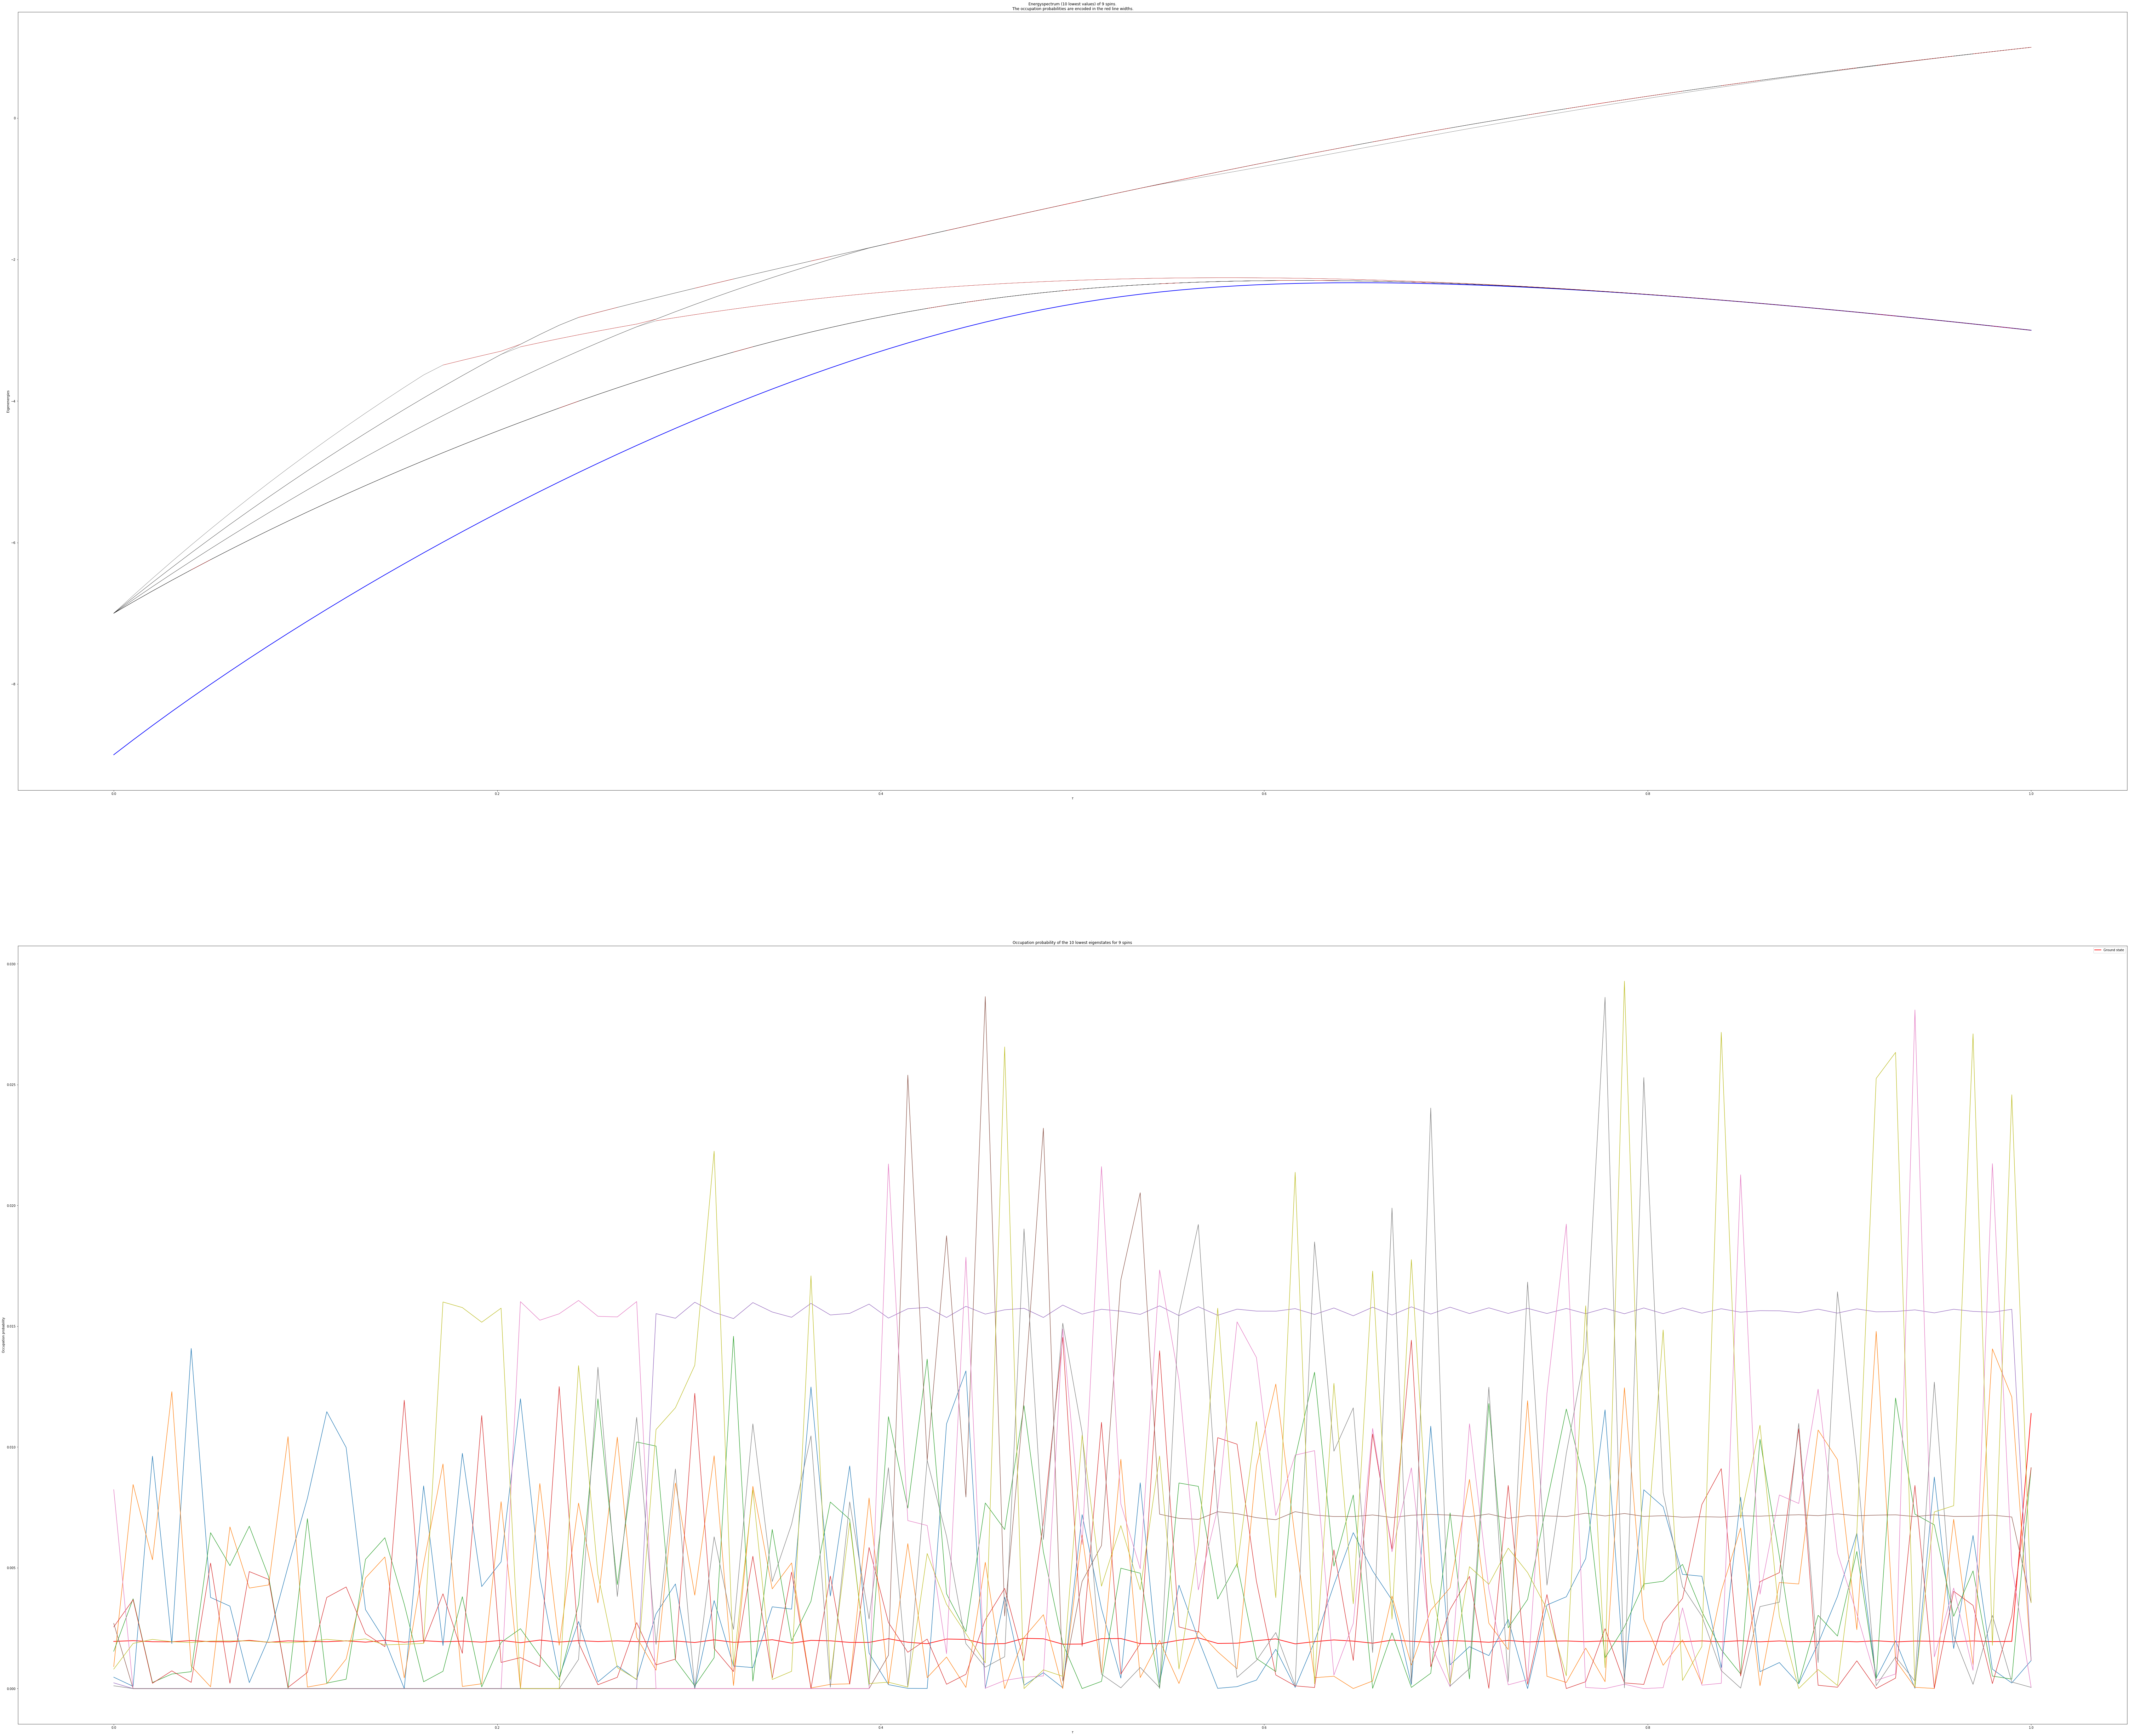

In [8]:
# f = plt.figure()
fig, axes = plt.subplots(2, 1, figsize=(120,100))

#
# plot the energy eigenvalues
#

# first draw thin lines outlining the energy spectrum
for n in range(len(evals_mat[0,:])):
    ls,lw = ('b',2) if n == 0 else ('k', 0.5)
    axes[0].plot(taulist/max(taulist), evals_mat[:,n], ls, lw=lw)

# second, draw line that encode the occupation probability of each state in 
# its linewidth. thicker line => high occupation probability.
for idx in range(len(taulist)-1):
    for n in range(len(P_mat[0,:])):
        lw = 0.5 + 4*P_mat[idx,n]    
        if lw > 0.55:
           axes[0].plot(array([taulist[idx], taulist[idx+1]])/taumax, 
                        array([evals_mat[idx,n], evals_mat[idx+1,n]]), 
                        'r', linewidth=lw)    
        
axes[0].set_xlabel(r'$\tau$')
axes[0].set_ylabel('Eigenenergies')
axes[0].set_title("Energyspectrum (%d lowest values) of %d spins.\n " % (M,N)
                + "The occupation probabilities are encoded in the red line widths.")


# plot the occupation probabilities for the few lowest eigenstates

for n in range(len(P_mat[0,:])):
    if n == 0:
        axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n], 'r', linewidth=2)
    else:
        axes[1].plot(taulist/max(taulist), 0 + P_mat[:,n])

axes[1].set_xlabel(r'$\tau$')
axes[1].set_ylabel('Occupation probability')
axes[1].set_title("Occupation probability of the %d lowest " % M +
                  "eigenstates for %d spins" % N)
axes[1].legend(("Ground state",));


In [9]:
H0


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
Qobj data =
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]

In [10]:
psi_list

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[1.]
  [0.]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
 Qobj data =
 [[0.]
  [1.]]]

In [11]:
psi0.shape

(512, 1)

In [12]:
for l in range(512):
    print((sz_list[0]+sz_list[1]+sz_list[2]).diag())


[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

 -3. -3. -3. -3. -3. -3. -3. -3.]
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. 

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

 -3. -3. -3. -3. -3. -3. -3. -3.]
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. 

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [13]:
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [14]:
h_t

[[Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[0. 1. 1. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 0. 0. 1.]
   [0. 0. 0. ... 1. 1. 0.]], <function __main__.<lambda>(t, args)>],
 [Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2]], shape = (512, 512), type = oper, isherm = True
  Qobj data =
  [[30.  0.  0. ...  0.  0.  0.]
   [ 0. 18.  0. ...  0.  0.  0.]
   [ 0.  0. 18. ...  0.  0.  0.]
   ...
   [ 0.  0.  0. ... 46.  0.  0.]
   [ 0.  0.  0. ...  0. 46.  0.]
   [ 0.  0.  0. ...  0.  0. 66.]],
  <function __main__.<lambda>(t, args)>]]

In [10]:
ev, es = H0.eigenstates(eigvals=M)

In [16]:
basis(2,1).proj()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [12]:
print(ev)

[-9. -7. -7. -7. -7. -7. -7. -7. -7. -7.]


In [17]:
ekets_mat[len(taulist)-1][0].ptrace(1)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [18]:
tensor(basis(2,0),basis(2,0))

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [19]:
basis(2,0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]